# Empirische Analyse von Prior-Daten Konflikten in BNNs

## Tiefe BNNs

### Import der benötigten Pakete und definieren der Loss-Funktion

In [1]:
import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import cm
from scipy.stats import multivariate_normal, norm, uniform, norm, beta, bernoulli
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
import seaborn as sns

%matplotlib inline

2023-05-03 14:19:00.112907: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Applications/anaconda3/envs/abgabe/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
neg_log_like = lambda y, rv_y: -rv_y.log_prob(y)

In [3]:
import random
np.random.seed(123)
tf.random.set_seed(124)
random.seed(123)

In [4]:
plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]
#Options
params = {'text.usetex' : True,
          'font.size' : "18",
          'font.family' : 'lmodern',
          'legend.fontsize': "18", 
          }
plt.rcParams.update(params) 

/var/folders/zp/1hx5lv0d4b95fw3_z7q4t74h0000gn/T/ipykernel_33280/514745690.py:1: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]


In [5]:
# Wird für Violinplots genutzt, um Labels hinzuzufügen
def add_label(violin, label):
    color = violin["bodies"][0].get_facecolor().flatten()
    labels.append((mpatches.Patch(color=color), label))

### Generierung des synthetischen Datensatzes

In [6]:
# Sample Data
n10 = 10
n100 = 100
n1000 = 1000
X = np.random.normal( size = (n1000, 1))
y = np.random.normal(np.cos(5 * X) / (np.abs(X) + 1) + 100, .5).ravel()
X = np.hstack((X, X**2, X**3))

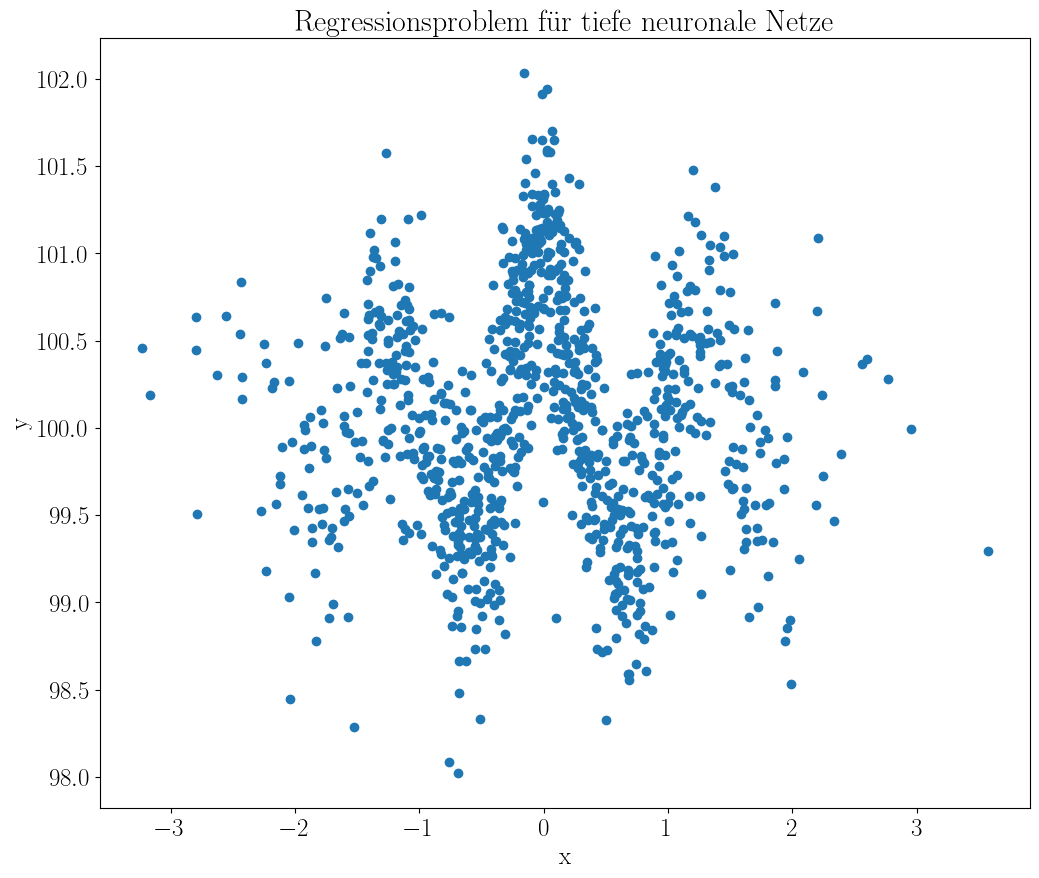

In [7]:
plt.figure(figsize=(12,10))
plt.scatter(X[:, 0], y)
plt.xlabel("x")
plt.ylabel("y") 
plt.title("Regressionsproblem für tiefe neuronale Netze")
plt.savefig("bilder/NN_basis.png", dpi=1000, bbox_inches='tight')
plt.show()


In [8]:
n_features = X.shape[1]
n_hidden = 100
n_out = 1

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(n_features,)),
    tf.keras.layers.Dense(n_hidden, activation = "relu", kernel_initializer=tf.keras.initializers.RandomNormal(10, 1), bias_initializer=tf.keras.initializers.RandomNormal(10, 1)),
    tf.keras.layers.Dense(n_hidden, activation = "relu", kernel_initializer=tf.keras.initializers.RandomNormal(10, 1), bias_initializer=tf.keras.initializers.RandomNormal(10, 1)),

    tf.keras.layers.Dense(n_out, kernel_initializer=tf.keras.initializers.RandomNormal(10, 1), bias_initializer=tf.keras.initializers.RandomNormal(10, 1))
])

model.compile(optimizer=tf.optimizers.Adam(learning_rate=.01), loss = tf.losses.mean_squared_error)
history = model.fit(X, y, epochs=5000, verbose = False, batch_size=32)

2023-05-03 14:19:20.972005: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
X_pred = np.atleast_2d(np.linspace(-3, 3, num = 100)).T
X_pred = np.hstack((X_pred, X_pred ** 2, X_pred ** 3))

In [10]:
y_hat = model(X_pred)

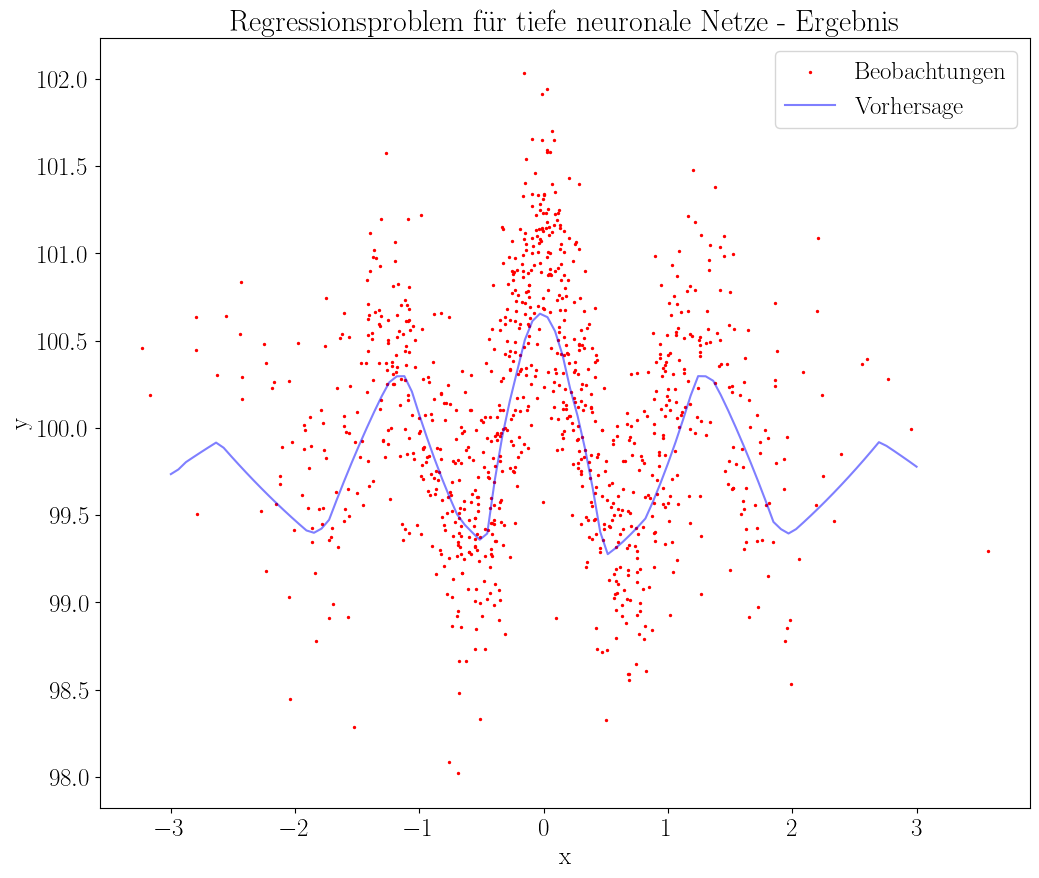

In [11]:
plt.figure(figsize=(12,10))
plt.scatter(X[:,0], y, color="red", s = 2, label="Beobachtungen")
plt.plot(X_pred[:,0], y_hat, alpha = 0.5, color = "blue", label="Vorhersage")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regressionsproblem für tiefe neuronale Netze - Ergebnis")
plt.legend()
plt.savefig("bilder/NN_pred.png", dpi=1000, bbox_inches='tight')
plt.show()

In [12]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(3, 100) dtype=float32, numpy=
 array([[-4.30271292e+00, -2.21631432e+00, -3.49136543e+00,
         -1.86284399e+00, -9.69548404e-01, -5.13113356e+00,
         -4.09472132e+00, -3.04192138e+00, -1.43777466e+00,
         -3.03250837e+00, -2.30099440e+00, -1.57960260e+00,
         -3.40350676e+00, -4.32710409e+00, -1.76832998e+00,
         -2.78641367e+00, -3.34683824e+00, -1.77741957e+00,
         -3.75351930e+00, -3.70130849e+00, -2.73898196e+00,
         -1.95191038e+00, -6.07484674e+00, -3.11906242e+00,
         -1.41751719e+00, -1.01366544e+00, -4.06156778e+00,
         -3.18250704e+00, -3.17134285e+00, -2.94432569e+00,
         -2.43019462e+00, -3.41155005e+00, -5.43070459e+00,
         -4.28355694e+00, -4.58833188e-01, -1.55069947e+00,
         -1.92430472e+00, -2.66420770e+00, -5.75587654e+00,
         -4.37354422e+00, -3.65071440e+00, -3.16548109e+00,
         -3.27952099e+00,  4.02829200e-01, -1.73192132e+00,
         -3.80281806e-02, -2.611

In [13]:
k1 = model.weights[0].numpy() # kernel of first layer
b1 = model.weights[1].numpy() # bias of first layer
k2 = model.weights[2].numpy() # kernel of second layer
b2 = model.weights[3].numpy() # bias of second layer
k3 = model.weights[4].numpy() # kernel of third layer
b3 = model.weights[5].numpy() # bias of third layer

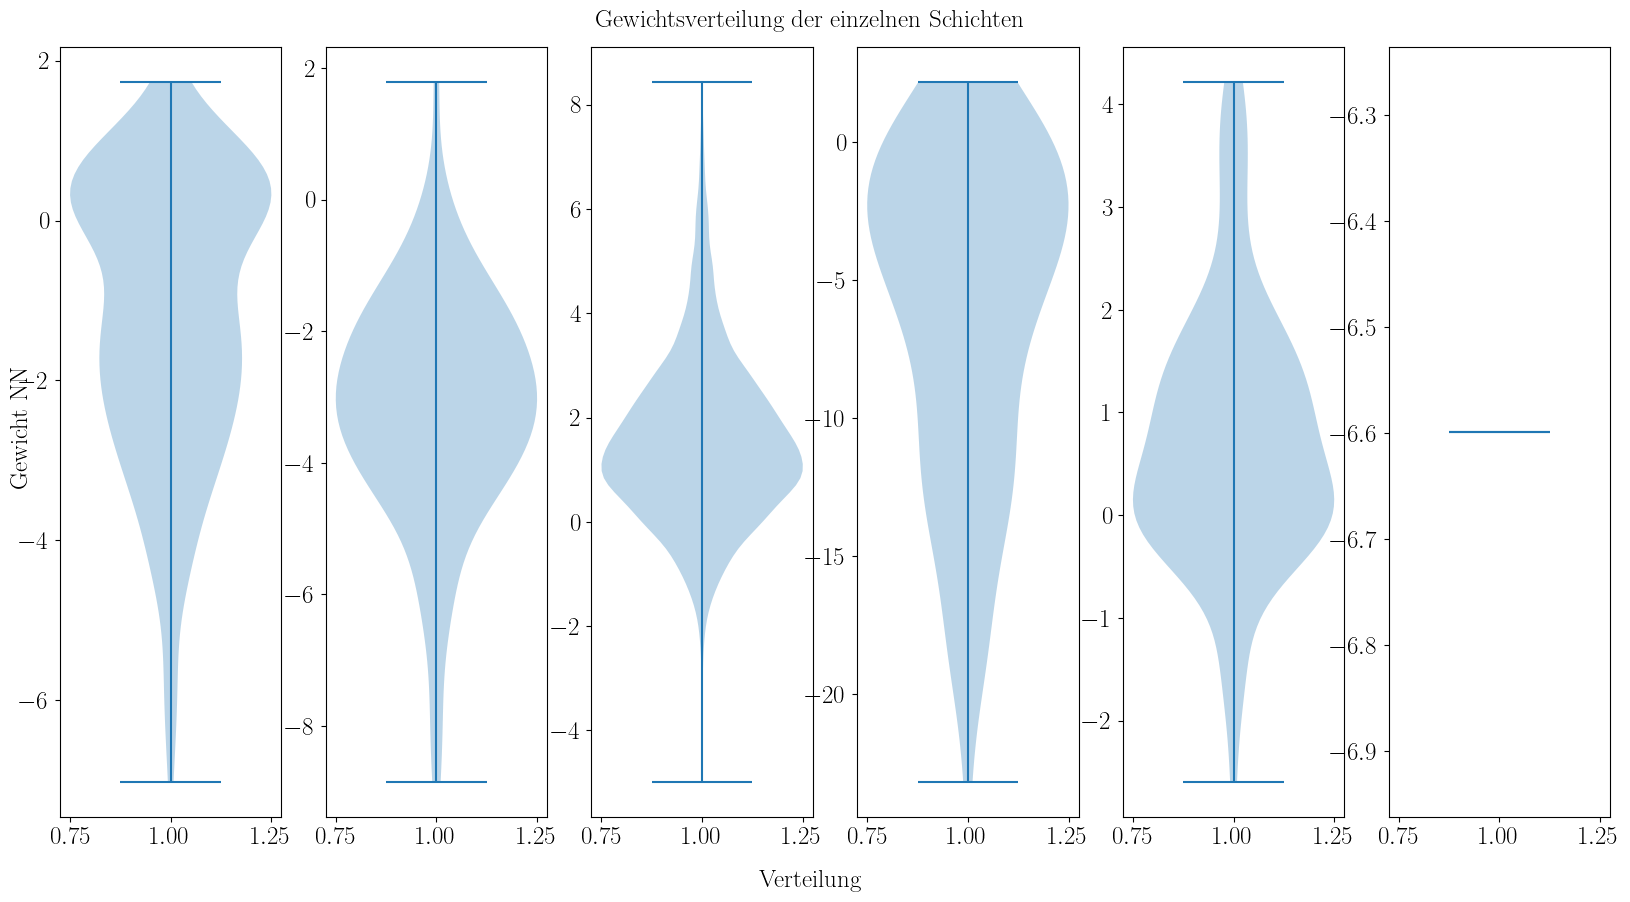

In [14]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize=(20,10))
ax1.violinplot(k1.ravel())
ax2.violinplot(b1.ravel())
ax3.violinplot(k2.ravel())
ax4.violinplot(b2.ravel())
ax5.violinplot(k3.ravel())
ax6.violinplot(b3.ravel())
fig.text(0.5, .9, "Gewichtsverteilung der einzelnen Schichten", ha="center", fontsize=18)
fig.text(0.5, 0.04, 'Verteilung', ha='center')
fig.text(0.1, 0.5, 'Gewicht NN', va='center', rotation='vertical')
plt.savefig("bilder/NN_gewichte.png", dpi=1000, bbox_inches='tight')
plt.show()

Hier wird der Zieldatensatz erzeugt

In [15]:
# Use previous weights as ground truth
aleatoric_noise = .1
X_pred = np.atleast_2d(np.random.normal(0, .5, size = (1000,))).T
X_pred = np.hstack((X_pred, X_pred ** 2, X_pred ** 3))
y_true = np.random.normal(model(X_pred), aleatoric_noise)

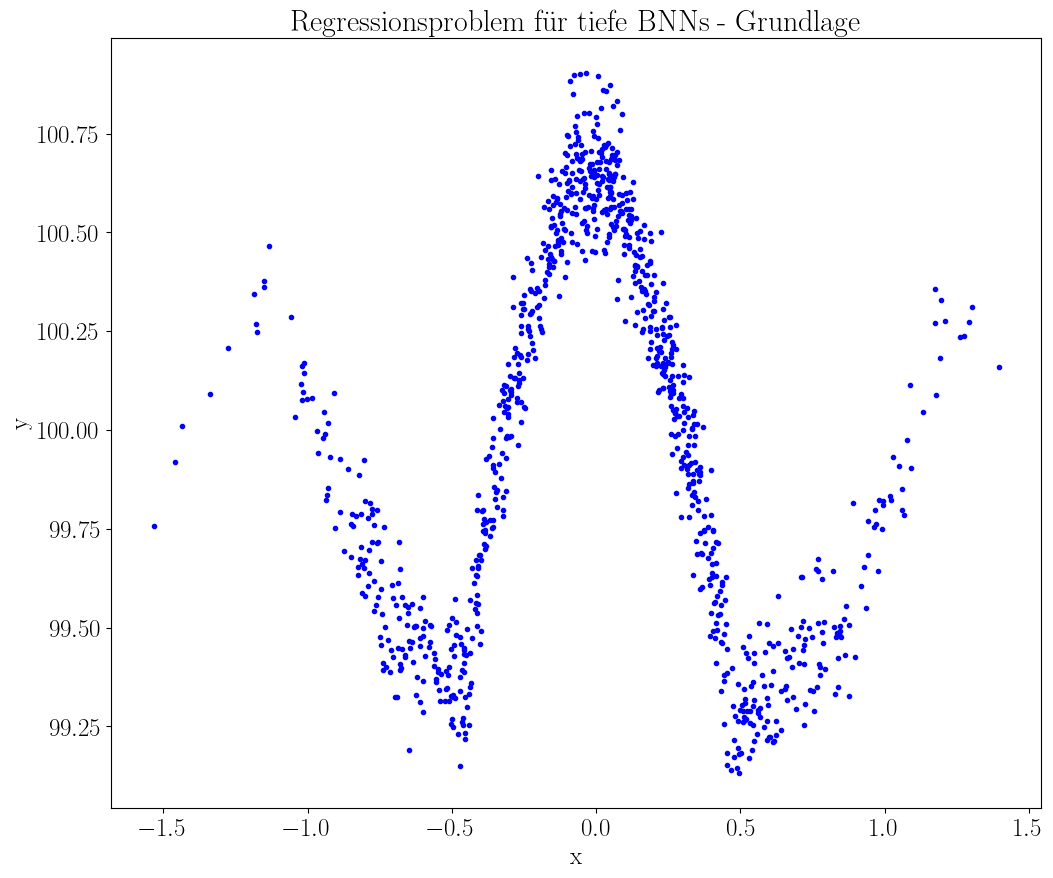

In [16]:
plt.figure(figsize=(12,10))
plt.plot(X_pred[:,0], y_true, "b.")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regressionsproblem für tiefe BNNs - Grundlage")
plt.savefig("bilder/BNN_basis.png", dpi=1000, bbox_inches='tight')
plt.show()

### Definition der prior und posterior verteilungen

In [17]:
## Prior Daten Konflikt
# Standardnormalverteilung
def prior_base(kernel_size, bias_size, dtype = None):
    n = kernel_size + bias_size # num of params
    return tf.keras.Sequential([
       tfp.layers.DistributionLambda(
           #lambda t: tfp.distributions.Independent(tfp.distributions.Normal(loc = 0, scale=1))
           #lambda t: tfp.distributions.Normal(loc = tf.zeros(n), scale= tf.ones(n))
           lambda t: tfp.distributions.MultivariateNormalDiag(loc = tf.zeros(n), scale_diag=tf.ones(n))
       )                     
  ])

# skalierung mit 0.1
def prior_p1(kernel_size, bias_size, dtype = None):
    n = kernel_size + bias_size # num of params
    return tf.keras.Sequential([
       tfp.layers.DistributionLambda(
           #lambda t: tfp.distributions.Independent(tfp.distributions.Normal(loc = 0, scale=1))
           #lambda t: tfp.distributions.Normal(loc = tf.zeros(n), scale= tf.ones(n))
           lambda t: tfp.distributions.MultivariateNormalDiag(loc = tf.zeros(n), scale_diag=tf.ones(n) * np.sqrt(.1))
       )                     
  ])

# skalierung mit 10
def prior_4(kernel_size, bias_size, dtype = None):
    n = kernel_size + bias_size # num of params
    return tf.keras.Sequential([
       tfp.layers.DistributionLambda(
           #lambda t: tfp.distributions.Independent(tfp.distributions.Normal(loc = 0, scale=1))
           #lambda t: tfp.distributions.Normal(loc = tf.zeros(n), scale= tf.ones(n))
           lambda t: tfp.distributions.MultivariateNormalDiag(loc = tf.zeros(n), scale_diag=tf.ones(n) * np.sqrt(10))
       )                     
  ])

## Kein Prior Daten Konflikt
# Exakte Prior mit Einheitsmatrix als Kovarianzmatrix für die dritte Schicht
def prior_exact2_1(kernel_size, bias_size, dtype = None):
    n = kernel_size + bias_size # num of params
    return tf.keras.Sequential([
       tfp.layers.DistributionLambda(
           #lambda t: tfp.distributions.Independent(tfp.distributions.Normal(loc = 0, scale=1))
           #lambda t: tfp.distributions.Normal(loc = tf.ones(n) * np.hstack((k3.ravel(), b3.ravel())), scale= tf.ones(n))
           lambda t: tfp.distributions.MultivariateNormalDiag(loc = tf.ones(n) * np.hstack((k3.ravel(), b3.ravel())), scale_diag= tf.ones(n))
       )                     
  ])

# skalierung mit 0.1
def prior_exact2_p1(kernel_size, bias_size, dtype = None):
    n = kernel_size + bias_size # num of params
    return tf.keras.Sequential([
       tfp.layers.DistributionLambda(
           #lambda t: tfp.distributions.Independent(tfp.distributions.Normal(loc = 0, scale=1))
           #lambda t: tfp.distributions.Normal(loc = tf.ones(n) * np.hstack((k3.ravel(), b3.ravel())), scale= tf.ones(n))
           lambda t: tfp.distributions.MultivariateNormalDiag(loc = tf.ones(n) * np.hstack((k3.ravel(), b3.ravel())), scale_diag= tf.ones(n) * np.sqrt(.1))
       )                     
  ])

# skalierung mit 10
def prior_exact2_4(kernel_size, bias_size, dtype = None):
    n = kernel_size + bias_size # num of params
    return tf.keras.Sequential([
       tfp.layers.DistributionLambda(
           #lambda t: tfp.distributions.Independent(tfp.distributions.Normal(loc = 0, scale=1))
           #lambda t: tfp.distributions.Normal(loc = tf.ones(n) * np.hstack((k3.ravel(), b3.ravel())), scale= tf.ones(n))
           lambda t: tfp.distributions.MultivariateNormalDiag(loc = tf.ones(n) * np.hstack((k3.ravel(), b3.ravel())), scale_diag= tf.ones(n) * np.sqrt(10))
       )                     
  ])

## Posterior
#mean-field posterior
def posterior(kernel_size, bias_size, dtype = None):
    n = kernel_size + bias_size # num of params
    return tf.keras.Sequential([
        tfp.layers.VariableLayer(2*n, dtype=dtype),
        tfp.layers.DistributionLambda(lambda t: tfp.distributions.Independent(
            tfp.distributions.Normal(loc = t[..., :n], scale = 1e-5 + tf.math.softplus(t[...,n:]) )
        ))
    ])

### Analyse des Effekts eines Prior-Daten Konfliktes

Bauen des Netzwerkes. Verwendet wird eine batchsize von 32, die Architektur des Netzwerkes ist äquivalent zur Architektur des NNs. <br>
Da es sich um ein Regressionsproblem handelt wird eine Normalverteilung modelliert mit fixer (aleatorischer) Varianz

In [18]:
batch_size = 32
kl_weight = 1/int(X_pred.shape[0]/32)

base_model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(3,)), 
    tfp.layers.DenseVariational(units=100, make_posterior_fn=posterior, make_prior_fn=prior_base, kl_weight=kl_weight),
    tf.keras.layers.Activation("relu"),
    tfp.layers.DenseVariational(units=100, make_posterior_fn=posterior, make_prior_fn=prior_base, kl_weight=kl_weight),
    tf.keras.layers.Activation("relu"),
    tfp.layers.DenseVariational(units=1, make_posterior_fn=posterior, make_prior_fn=prior_base, kl_weight=kl_weight),
    tfp.layers.DistributionLambda(lambda t: tfp.distributions.Normal(loc = t, scale=.1))
])
base_model.build()

Instructions for updating:
Please pass an integer value for `reinterpreted_batch_ndims`. The current behavior corresponds to `reinterpreted_batch_ndims=tf.size(distribution.batch_shape_tensor()) - 1`.
Instructions for updating:
`scale_identity_multiplier` is deprecated; please combine it into `scale_diag` directly instead.


Damit die Gewichte besser vergleichbar sind wird nur das dritte Layer trainiert. Die ersten beiden Layer werden fixiert und mit den exakten Gewichten des NNs initialisiert, wobei eine sehr geringe Varianz spezifiziert wird. Das heißt das Netzwerk weist bezüglich dieser Parameter eine sehr hohe Sicherheit auf.

In [19]:
base_model.layers[0].trainable = False # erstes Layer
base_model.layers[2].trainable = False # zweites Layer
base_model.layers[4].trainable = True # drittes Layer

In [20]:
l_weights = base_model.get_weights()

In [21]:
#l_weights[0] = np.hstack(( np.zeros_like(k1.ravel()), np.zeros_like(b1.ravel()), np.zeros_like(k1.ravel()), np.zeros_like(b1.ravel()) )) #layer 1
l_weights[0] = np.hstack((k1.ravel(), b1.ravel(), np.ones_like(k1.ravel()) * -8, np.ones_like(b1.ravel()) * -8))
l_weights[1] = np.hstack(( k2.ravel(), b2.ravel(), np.ones_like(k2.ravel()) * -8, np.ones_like(b2.ravel()) * -8)) #layer 2
#l_weights[1] = np.hstack(( np.zeros_like(k2.ravel()), np.zeros_like(b2.ravel()), np.zeros_like(k2.ravel()), np.zeros_like(b2.ravel()) ))
#l_weights[2] = np.hstack((k3.ravel(), b3.ravel(), np.ones_like(k3.ravel()) * -8, np.ones_like(b3.ravel()) * -8)) #layer 3
#l_weights[2] = np.hstack(( np.zeros_like(k1.ravel()), np.zeros_like(b1.ravel()), np.zeros_like(k1.ravel()), np.zeros_like(b1.ravel()) ))

In [22]:
base_model.set_weights(l_weights)

In [23]:
base_model.get_weights()

[array([-4.30271292e+00, -2.21631432e+00, -3.49136543e+00, -1.86284399e+00,
        -9.69548404e-01, -5.13113356e+00, -4.09472132e+00, -3.04192138e+00,
        -1.43777466e+00, -3.03250837e+00, -2.30099440e+00, -1.57960260e+00,
        -3.40350676e+00, -4.32710409e+00, -1.76832998e+00, -2.78641367e+00,
        -3.34683824e+00, -1.77741957e+00, -3.75351930e+00, -3.70130849e+00,
        -2.73898196e+00, -1.95191038e+00, -6.07484674e+00, -3.11906242e+00,
        -1.41751719e+00, -1.01366544e+00, -4.06156778e+00, -3.18250704e+00,
        -3.17134285e+00, -2.94432569e+00, -2.43019462e+00, -3.41155005e+00,
        -5.43070459e+00, -4.28355694e+00, -4.58833188e-01, -1.55069947e+00,
        -1.92430472e+00, -2.66420770e+00, -5.75587654e+00, -4.37354422e+00,
        -3.65071440e+00, -3.16548109e+00, -3.27952099e+00,  4.02829200e-01,
        -1.73192132e+00, -3.80281806e-02, -2.61196256e+00, -2.86512040e-02,
         1.27721041e-01, -5.75428867e+00, -2.71463180e+00, -1.90074623e+00,
        -5.9

Ausführen des Modells. Es wird EarlyStopping mit einer Patience von 500 verwendet um sicherzugehen, dass das Netzwerk konvergiert ist und gleichzeitig den Rechenaufwand zu reduzieren.

In [24]:
cb = tf.keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=1e-4, patience = 500, mode = "min", verbose = 1)
base_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss = neg_log_like)
base_model.fit(X_pred, y_true, epochs = 10000, verbose = False, batch_size = batch_size, callbacks=cb, validation_split=.3)

Epoch 1319: early stopping


Finale Gewichte des Modells. Die ersten beiden Layer sind konstant geblieben und weisen die exakten Gewichte des NNs auf

In [25]:
base_model.weights

[<tf.Variable 'dense_variational/posterior/constant:0' shape=(800,) dtype=float32, numpy=
 array([-4.30271292e+00, -2.21631432e+00, -3.49136543e+00, -1.86284399e+00,
        -9.69548404e-01, -5.13113356e+00, -4.09472132e+00, -3.04192138e+00,
        -1.43777466e+00, -3.03250837e+00, -2.30099440e+00, -1.57960260e+00,
        -3.40350676e+00, -4.32710409e+00, -1.76832998e+00, -2.78641367e+00,
        -3.34683824e+00, -1.77741957e+00, -3.75351930e+00, -3.70130849e+00,
        -2.73898196e+00, -1.95191038e+00, -6.07484674e+00, -3.11906242e+00,
        -1.41751719e+00, -1.01366544e+00, -4.06156778e+00, -3.18250704e+00,
        -3.17134285e+00, -2.94432569e+00, -2.43019462e+00, -3.41155005e+00,
        -5.43070459e+00, -4.28355694e+00, -4.58833188e-01, -1.55069947e+00,
        -1.92430472e+00, -2.66420770e+00, -5.75587654e+00, -4.37354422e+00,
        -3.65071440e+00, -3.16548109e+00, -3.27952099e+00,  4.02829200e-01,
        -1.73192132e+00, -3.80281806e-02, -2.61196256e+00, -2.86512040e-02

In [26]:
X_pred_ = np.atleast_2d(np.linspace(-1.5,1.5, 100)).T
X_pred_ = np.hstack((X_pred_, X_pred_**2, X_pred_**3))


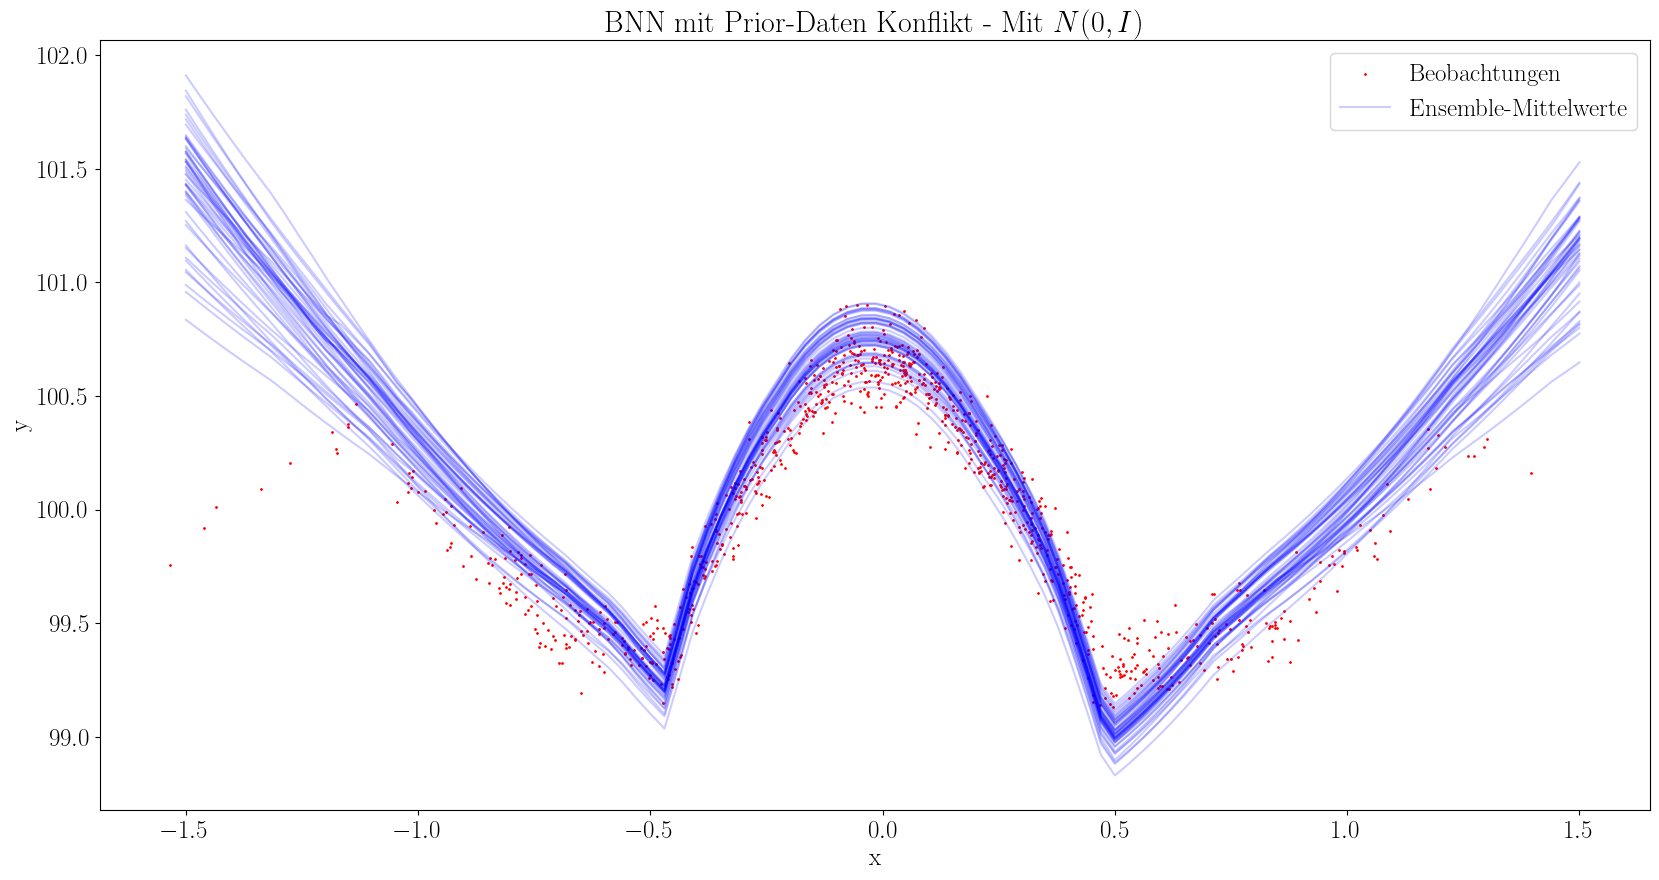

In [27]:
plt.figure(figsize=(20,10))
plt.scatter(X_pred[:,0], y_true, color="red", s=1, label="Beobachtungen")
plt.title(r"BNN mit Prior-Daten Konflikt - Mit $N(0, I)$")
plt.xlabel("x")
plt.ylabel("y")
for i in range(50):
    plt.plot(X_pred_[:,0], base_model(X_pred_).mean(), color= "blue", alpha = .2, label="Ensemble-Mittelwerte" if i == 0 else None)
plt.legend(loc="upper right")
plt.savefig("bilder/BNN_PDK_I.png", dpi=1000, bbox_inches='tight')
plt.show()

Visualisierung der Gewichte des letzten (trainieren) Layers. Offensichtlich weist die Gewichte eine recht gute Anpassung auf. Allerdings unterscheiden sich viele doch wesentlich von den _optimalen_ Parametern

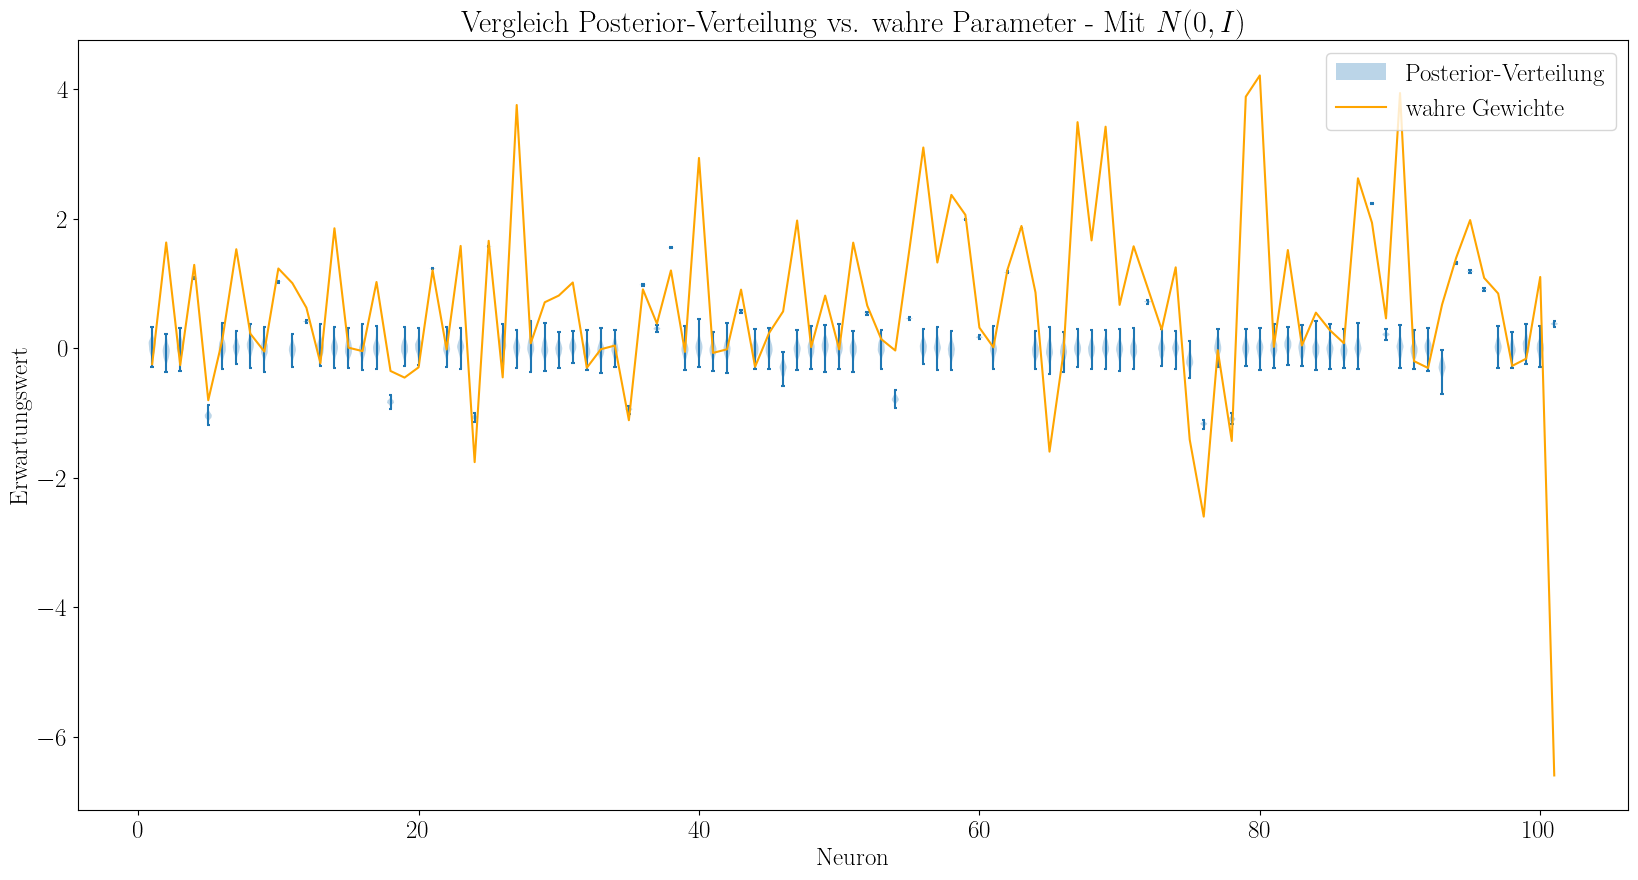

In [28]:
plt.figure(figsize=(20,10))
vp1 = plt.violinplot(np.array([np.random.normal(mean, sd, 1000) for mean, sd in zip(base_model.layers[4]._posterior(np.array([0])).mean().numpy(), base_model.layers[4]._posterior(np.array([0])).stddev().numpy())]).T)
sc1 = plt.plot(range(1, 102), np.hstack((k3.ravel(), b3.ravel())), label="wahre Gewichte", color = "orange")
plt.legend([vp1["bodies"][0], sc1[0]], ["Posterior-Verteilung", "wahre Gewichte"], loc="upper right")
plt.ylabel("Erwartungswert")
plt.xlabel("Neuron")
plt.title(r"Vergleich Posterior-Verteilung vs. wahre Parameter - Mit $N(0, I)$")
plt.savefig("bilder/BNN_PDK_I_vergleich.png", dpi=1000, bbox_inches='tight')
plt.show()

### Analyse des Effekts ohne Prior-Daten Konflikt

Da die tatsächlichen Gewichte bekannt sind kann die Prior-Verteilung ideal initialisiert werden. Hierfür wird eine Base-Prior für die beiden nicht trainierbaren Layer genutzt (diese ist allerdings irrelevant) und eine Prior-Verteilung für das letzte Layer genutzt, mit den exakten Parametern. Die Sicherheit bezüglich der Parameter wird mit 1 ($\sigma^2 = 1$) initialisiert

In [29]:
batch_size = 32

ideal_model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(3,)), 
    tfp.layers.DenseVariational(units=100, make_posterior_fn=posterior, make_prior_fn=prior_base, kl_weight=kl_weight),
    tf.keras.layers.Activation("relu"),
    tfp.layers.DenseVariational(units=100, make_posterior_fn=posterior, make_prior_fn=prior_base, kl_weight=kl_weight),
    tf.keras.layers.Activation("relu"),
    tfp.layers.DenseVariational(units=1, make_posterior_fn=posterior, make_prior_fn=prior_exact2_1, kl_weight=kl_weight),
    tfp.layers.DistributionLambda(lambda t: tfp.distributions.Normal(loc = t, scale=.1))
])
ideal_model.build()

In [30]:
ideal_model.layers[0].trainable = False # erstes Layer
ideal_model.layers[2].trainable = False # zweites Layer
ideal_model.layers[4].trainable = True # drittes Layer

In [31]:
l_weights = ideal_model.get_weights()

In [32]:
l_weights

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

In [33]:
#l_weights[0] = np.hstack(( np.zeros_like(k1.ravel()), np.zeros_like(b1.ravel()), np.zeros_like(k1.ravel()), np.zeros_like(b1.ravel()) )) #layer 1
l_weights[0] = np.hstack((k1.ravel(), b1.ravel(), np.ones_like(k1.ravel()) * -8, np.ones_like(b1.ravel()) * -8))
l_weights[1] = np.hstack(( k2.ravel(), b2.ravel(), np.ones_like(k2.ravel()) * -8, np.ones_like(b2.ravel()) * -8)) #layer 2
#l_weights[1] = np.hstack(( np.zeros_like(k2.ravel()), np.zeros_like(b2.ravel()), np.zeros_like(k2.ravel()), np.zeros_like(b2.ravel()) ))
#l_weights[2] = np.hstack((k3.ravel(), b3.ravel(), np.ones_like(k3.ravel()) * -8, np.ones_like(b3.ravel()) * -8)) #layer 3
#l_weights[2] = np.hstack(( np.zeros_like(k1.ravel()), np.zeros_like(b1.ravel()), np.zeros_like(k1.ravel()), np.zeros_like(b1.ravel()) ))

In [34]:
ideal_model.set_weights(l_weights)

In [35]:
ideal_model.get_weights()

[array([-4.30271292e+00, -2.21631432e+00, -3.49136543e+00, -1.86284399e+00,
        -9.69548404e-01, -5.13113356e+00, -4.09472132e+00, -3.04192138e+00,
        -1.43777466e+00, -3.03250837e+00, -2.30099440e+00, -1.57960260e+00,
        -3.40350676e+00, -4.32710409e+00, -1.76832998e+00, -2.78641367e+00,
        -3.34683824e+00, -1.77741957e+00, -3.75351930e+00, -3.70130849e+00,
        -2.73898196e+00, -1.95191038e+00, -6.07484674e+00, -3.11906242e+00,
        -1.41751719e+00, -1.01366544e+00, -4.06156778e+00, -3.18250704e+00,
        -3.17134285e+00, -2.94432569e+00, -2.43019462e+00, -3.41155005e+00,
        -5.43070459e+00, -4.28355694e+00, -4.58833188e-01, -1.55069947e+00,
        -1.92430472e+00, -2.66420770e+00, -5.75587654e+00, -4.37354422e+00,
        -3.65071440e+00, -3.16548109e+00, -3.27952099e+00,  4.02829200e-01,
        -1.73192132e+00, -3.80281806e-02, -2.61196256e+00, -2.86512040e-02,
         1.27721041e-01, -5.75428867e+00, -2.71463180e+00, -1.90074623e+00,
        -5.9

In [36]:
cb = tf.keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=1e-4, patience = 500, mode = "min", verbose = 1)
ideal_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss = neg_log_like)
ideal_model.fit(X_pred, y_true, epochs = 10000, verbose = False, batch_size = batch_size, callbacks=cb, validation_split=.3)

Epoch 1319: early stopping


In [37]:
ideal_model.weights

[<tf.Variable 'dense_variational_3/posterior/constant:0' shape=(800,) dtype=float32, numpy=
 array([-4.30271292e+00, -2.21631432e+00, -3.49136543e+00, -1.86284399e+00,
        -9.69548404e-01, -5.13113356e+00, -4.09472132e+00, -3.04192138e+00,
        -1.43777466e+00, -3.03250837e+00, -2.30099440e+00, -1.57960260e+00,
        -3.40350676e+00, -4.32710409e+00, -1.76832998e+00, -2.78641367e+00,
        -3.34683824e+00, -1.77741957e+00, -3.75351930e+00, -3.70130849e+00,
        -2.73898196e+00, -1.95191038e+00, -6.07484674e+00, -3.11906242e+00,
        -1.41751719e+00, -1.01366544e+00, -4.06156778e+00, -3.18250704e+00,
        -3.17134285e+00, -2.94432569e+00, -2.43019462e+00, -3.41155005e+00,
        -5.43070459e+00, -4.28355694e+00, -4.58833188e-01, -1.55069947e+00,
        -1.92430472e+00, -2.66420770e+00, -5.75587654e+00, -4.37354422e+00,
        -3.65071440e+00, -3.16548109e+00, -3.27952099e+00,  4.02829200e-01,
        -1.73192132e+00, -3.80281806e-02, -2.61196256e+00, -2.86512040e-

In [38]:
X_pred_ = np.atleast_2d(np.linspace(-1.5,1.5, 100)).T
X_pred_ = np.hstack((X_pred_, X_pred_**2, X_pred_**3))


Visualisierung. Das Netz scheint sich bezüglich der funktionalen Form etwas sicherer zu sein. Die inherente Struktur der Daten wurde gelernt.

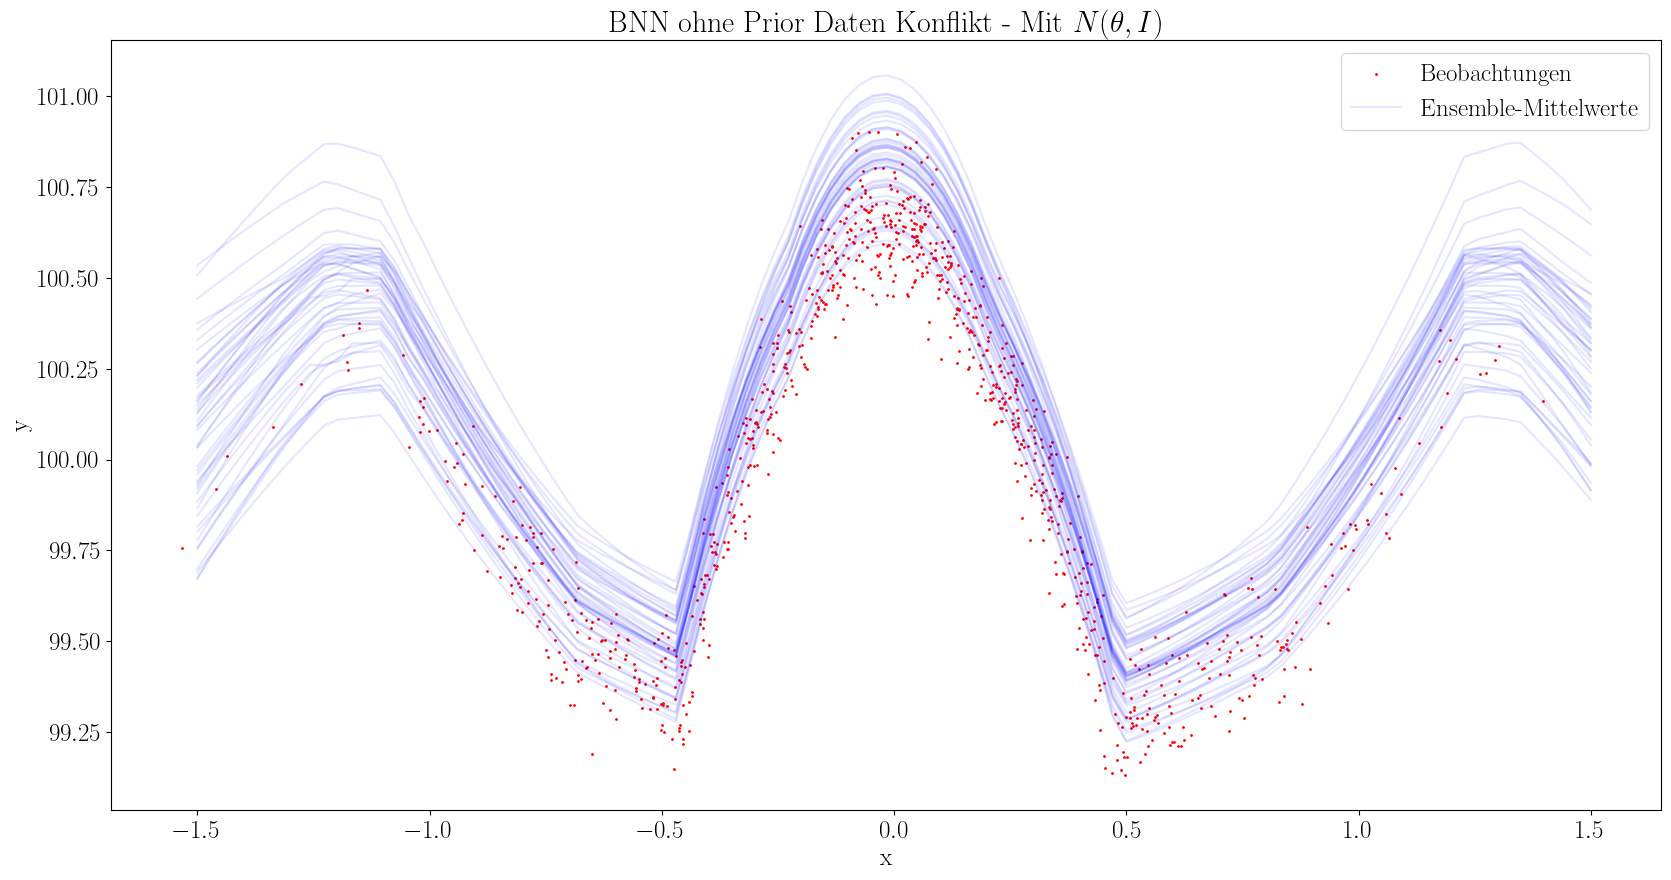

In [39]:
plt.figure(figsize=(20,10))
plt.scatter(X_pred[:,0], y_true, color="red", s=1, label="Beobachtungen")
plt.title(r"BNN ohne Prior Daten Konflikt - Mit $N(\theta, I)$")
plt.xlabel("x")
plt.ylabel("y")
for i in range(50):
    plt.plot(X_pred_[:,0], ideal_model(X_pred_).mean(), color= "blue", alpha = .1, label="Ensemble-Mittelwerte" if i == 0 else None)
plt.legend(loc="upper right")
plt.savefig("bilder/BNN_NPDK_I.png", dpi=1000, bbox_inches='tight')

plt.show()

Die Gewichte sind deutlich näher an den tatsächlichen Gewichten. Durch die Spezifizierung der exakten Gewichten als Prior-Annahme konnten demnach die tatsächlichen Gewichte sehr gut gelernt werden.

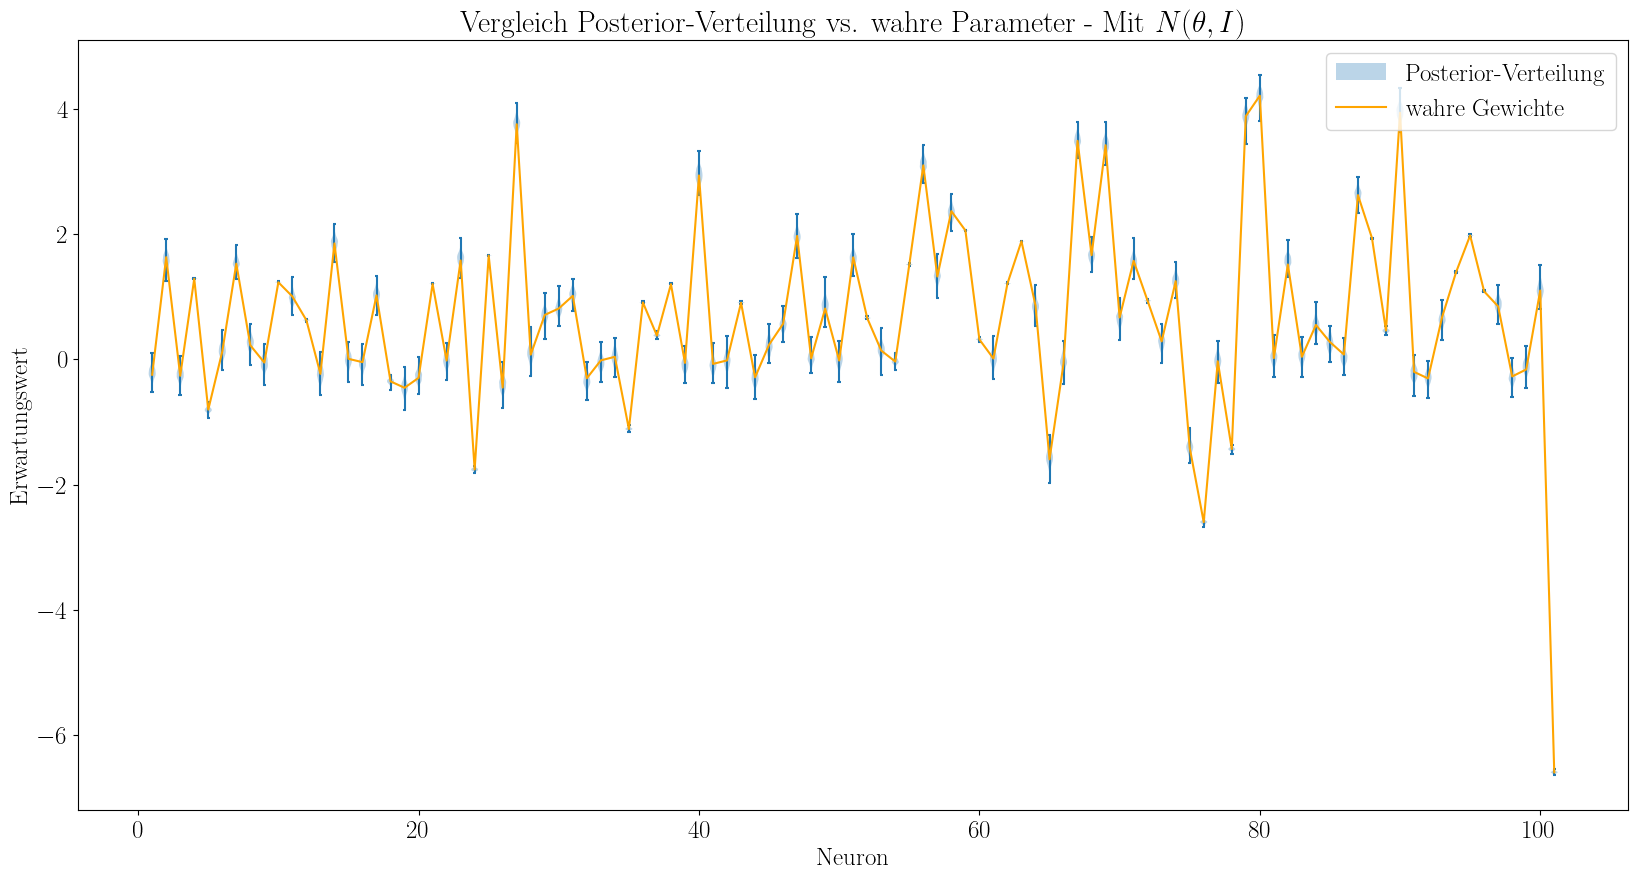

In [40]:
plt.figure(figsize=(20,10))
vp1 = plt.violinplot(np.array([np.random.normal(mean, sd, 1000) for mean, sd in zip(ideal_model.layers[4]._posterior(np.array([0])).mean().numpy(), ideal_model.layers[4]._posterior(np.array([0])).stddev().numpy())]).T)
sc1 = plt.plot(range(1, 102), np.hstack((k3.ravel(), b3.ravel())), label="wahre Gewichte", color = "orange")
plt.legend([vp1["bodies"][0], sc1[0]], ["Posterior-Verteilung", "wahre Gewichte"], loc="upper right")
plt.ylabel("Erwartungswert")
plt.xlabel("Neuron")
plt.title(r"Vergleich Posterior-Verteilung vs. wahre Parameter - Mit $N(\theta, I)$")
plt.savefig("bilder/BNN_NPDK_I_vergleich.png", dpi=1000, bbox_inches='tight')
plt.show()

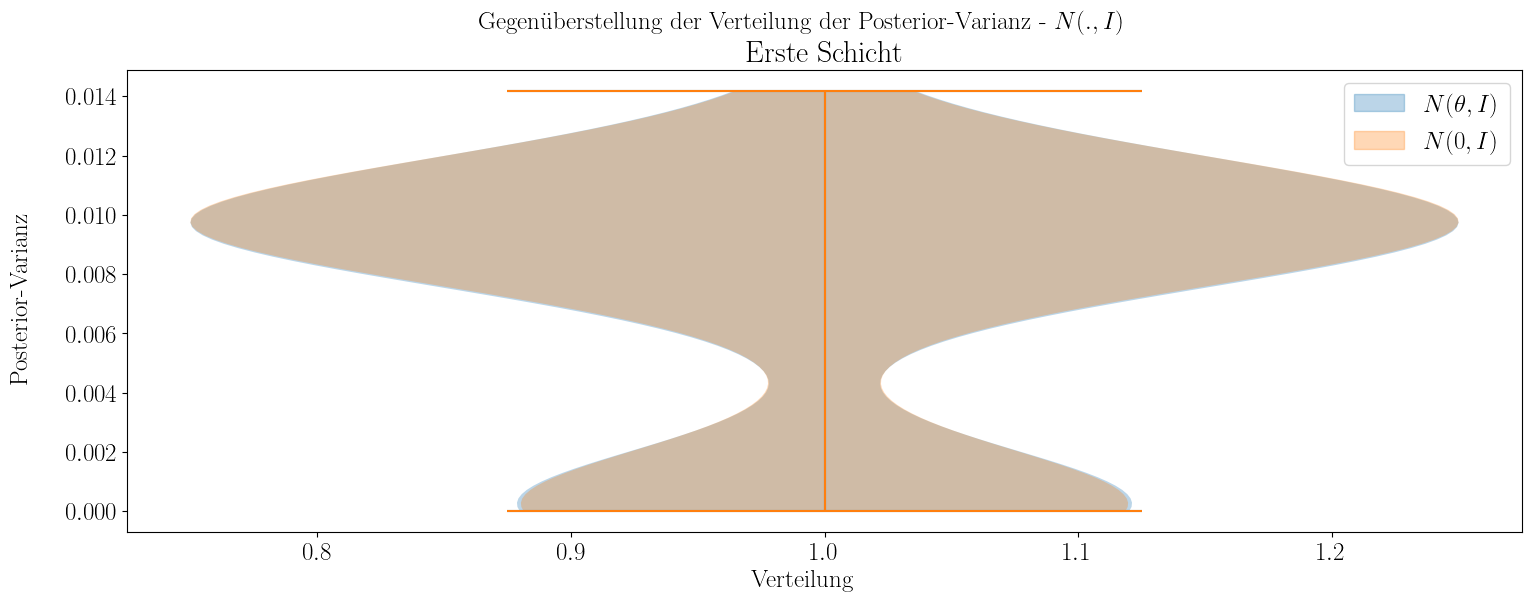

In [41]:
labels = []
fig, (ax1) = plt.subplots(1,1, figsize=(18, 6))
add_label(ax1.violinplot(np.power(ideal_model.layers[4]._posterior(np.array([0])).stddev().numpy(), 2)), r"$N(\theta, I)$")
add_label(ax1.violinplot(np.power(base_model.layers[4]._posterior(np.array([0])).stddev().numpy(), 2)), r"$N(0, I)$")
ax1.set_title("Erste Schicht")
ax1.legend(*zip(*labels), loc="upper right")
fig.text(0.5, .95, r"Gegenüberstellung der Verteilung der Posterior-Varianz - $N(., I)$", ha="center", fontsize=18)
fig.text(0.5, 0.02, 'Verteilung', ha='center')
fig.text(0.06, 0.5, 'Posterior-Varianz', va='center', rotation='vertical')
#plt.savefig("bilder/deep_bnn/dbnn_prior_I_gegenueb", dpi=1000, bbox_inches='tight')
plt.show()

### Analyse hinsichtlich der Varianz in den Schätzungen

Die Varianz für eine neue Beobachtung $x^*$ ergibt sich zu $Var(x^*|y,X,\theta) = Var(\mu_i) + E(\sigma_i)$ nach Valdenegro-Toro et. al.<br>
In Regionen von geringer Unsicherheit sollte das ideale Modell eine geringe Unsicherheit aufweisen, z.B. für x = 0.25 <br>
Für z.b. x = 3 sollte eine hohe Unsicherheit ausgewiesen werden

In [42]:
# Sample eine zufällige Beobachtung aus -3,3
x_star = np.atleast_2d(np.array([0.25]))
x_star_pred = np.hstack((x_star, x_star**2, x_star**3))
x_star_pred

x_star2 = np.atleast_2d(np.array([3]))
x_star_pred2 = np.hstack((x_star2, x_star2**2, x_star2**3))
x_star_pred2

array([[ 3,  9, 27]])

In [43]:
y_hats_1 = []
for i in range(50):
    y_hat_ = base_model(x_star_pred).mean().numpy()
    y_hats_1.append(y_hat_)

$E(\sigma^2)=.1$

In [44]:
var_x = np.var(y_hats_1) + .1
var_x

0.10663533806800843

In [45]:
y_hats_2 = []
for i in range(50):
    y_hat_ = ideal_model(x_star_pred2).mean().numpy()
    y_hats_2.append(y_hat_)

In [46]:
var_x2 = np.var(y_hats_2) + .1
var_x2

1.278045153617859

## Variation der Kovarianzmatrix

### $N(0, .1I)$

#### Prior-Daten Konflikt

Bauen des Netzwerkes. Verwendet wird eine batchsize von 32, die Architektur des Netzwerkes ist äquivalent zur Architektur des NNs. <br>
Da es sich um ein Regressionsproblem handelt wird eine Normalverteilung modelliert mit fixer (aleatorischer) Varianz

In [47]:
batch_size = 32
kl_weight = 1/int(X_pred.shape[0]/32)

base_model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(3,)), 
    tfp.layers.DenseVariational(units=100, make_posterior_fn=posterior, make_prior_fn=prior_p1, kl_weight=kl_weight),
    tf.keras.layers.Activation("relu"),
    tfp.layers.DenseVariational(units=100, make_posterior_fn=posterior, make_prior_fn=prior_p1, kl_weight=kl_weight),
    tf.keras.layers.Activation("relu"),
    tfp.layers.DenseVariational(units=1, make_posterior_fn=posterior, make_prior_fn=prior_p1, kl_weight=kl_weight),
    tfp.layers.DistributionLambda(lambda t: tfp.distributions.Normal(loc = t, scale=.1))
])
base_model.build()

Damit die Gewichte besser vergleichbar sind wird nur das dritte Layer trainiert. Die ersten beiden Layer werden fixiert und mit den exakten Gewichten des NNs initialisiert, wobei eine sehr geringe Varianz (0.002) spezifiziert wird. Das heißt das Netzwerk weist bezüglich dieser Parameter eine sehr hohe Sicherheit auf.

In [48]:
base_model.layers[0].trainable = False # erstes Layer
base_model.layers[2].trainable = False # zweites Layer
base_model.layers[4].trainable = True # drittes Layer

In [49]:
l_weights = base_model.get_weights()

In [50]:
#l_weights[0] = np.hstack(( np.zeros_like(k1.ravel()), np.zeros_like(b1.ravel()), np.zeros_like(k1.ravel()), np.zeros_like(b1.ravel()) )) #layer 1
l_weights[0] = np.hstack((k1.ravel(), b1.ravel(), np.ones_like(k1.ravel()) * -8, np.ones_like(b1.ravel()) * -8))
l_weights[1] = np.hstack(( k2.ravel(), b2.ravel(), np.ones_like(k2.ravel()) * -8, np.ones_like(b2.ravel()) * -8)) #layer 2
#l_weights[1] = np.hstack(( np.zeros_like(k2.ravel()), np.zeros_like(b2.ravel()), np.zeros_like(k2.ravel()), np.zeros_like(b2.ravel()) ))
#l_weights[2] = np.hstack((k3.ravel(), b3.ravel(), np.ones_like(k3.ravel()) * -8, np.ones_like(b3.ravel()) * -8)) #layer 3
#l_weights[2] = np.hstack(( np.zeros_like(k1.ravel()), np.zeros_like(b1.ravel()), np.zeros_like(k1.ravel()), np.zeros_like(b1.ravel()) ))

In [51]:
base_model.set_weights(l_weights)

In [52]:
base_model.get_weights()

[array([-4.30271292e+00, -2.21631432e+00, -3.49136543e+00, -1.86284399e+00,
        -9.69548404e-01, -5.13113356e+00, -4.09472132e+00, -3.04192138e+00,
        -1.43777466e+00, -3.03250837e+00, -2.30099440e+00, -1.57960260e+00,
        -3.40350676e+00, -4.32710409e+00, -1.76832998e+00, -2.78641367e+00,
        -3.34683824e+00, -1.77741957e+00, -3.75351930e+00, -3.70130849e+00,
        -2.73898196e+00, -1.95191038e+00, -6.07484674e+00, -3.11906242e+00,
        -1.41751719e+00, -1.01366544e+00, -4.06156778e+00, -3.18250704e+00,
        -3.17134285e+00, -2.94432569e+00, -2.43019462e+00, -3.41155005e+00,
        -5.43070459e+00, -4.28355694e+00, -4.58833188e-01, -1.55069947e+00,
        -1.92430472e+00, -2.66420770e+00, -5.75587654e+00, -4.37354422e+00,
        -3.65071440e+00, -3.16548109e+00, -3.27952099e+00,  4.02829200e-01,
        -1.73192132e+00, -3.80281806e-02, -2.61196256e+00, -2.86512040e-02,
         1.27721041e-01, -5.75428867e+00, -2.71463180e+00, -1.90074623e+00,
        -5.9

Ausführen des Modells. Es wird EarlyStopping mit einer Patience von 500 verwendet um sicherzugehen, dass das Netzwerk konvergiert ist und gleichzeitig den Rechenaufwand zu reduzieren.

In [53]:
cb = tf.keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=1e-4, patience = 500, mode = "min", verbose = 1)
base_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss = neg_log_like)
base_model.fit(X_pred, y_true, epochs = 10000, verbose = False, batch_size = batch_size, callbacks=cb, validation_split=.3)

Epoch 1140: early stopping


Finale Gewichte des Modells. Die ersten beiden Layer sind konstant geblieben und weisen die exakten Gewichte des NNs auf

In [54]:
base_model.weights

[<tf.Variable 'dense_variational_6/posterior/constant:0' shape=(800,) dtype=float32, numpy=
 array([-4.30271292e+00, -2.21631432e+00, -3.49136543e+00, -1.86284399e+00,
        -9.69548404e-01, -5.13113356e+00, -4.09472132e+00, -3.04192138e+00,
        -1.43777466e+00, -3.03250837e+00, -2.30099440e+00, -1.57960260e+00,
        -3.40350676e+00, -4.32710409e+00, -1.76832998e+00, -2.78641367e+00,
        -3.34683824e+00, -1.77741957e+00, -3.75351930e+00, -3.70130849e+00,
        -2.73898196e+00, -1.95191038e+00, -6.07484674e+00, -3.11906242e+00,
        -1.41751719e+00, -1.01366544e+00, -4.06156778e+00, -3.18250704e+00,
        -3.17134285e+00, -2.94432569e+00, -2.43019462e+00, -3.41155005e+00,
        -5.43070459e+00, -4.28355694e+00, -4.58833188e-01, -1.55069947e+00,
        -1.92430472e+00, -2.66420770e+00, -5.75587654e+00, -4.37354422e+00,
        -3.65071440e+00, -3.16548109e+00, -3.27952099e+00,  4.02829200e-01,
        -1.73192132e+00, -3.80281806e-02, -2.61196256e+00, -2.86512040e-

In [55]:
X_pred_ = np.atleast_2d(np.linspace(-1.5,1.5, 100)).T
X_pred_ = np.hstack((X_pred_, X_pred_**2, X_pred_**3))


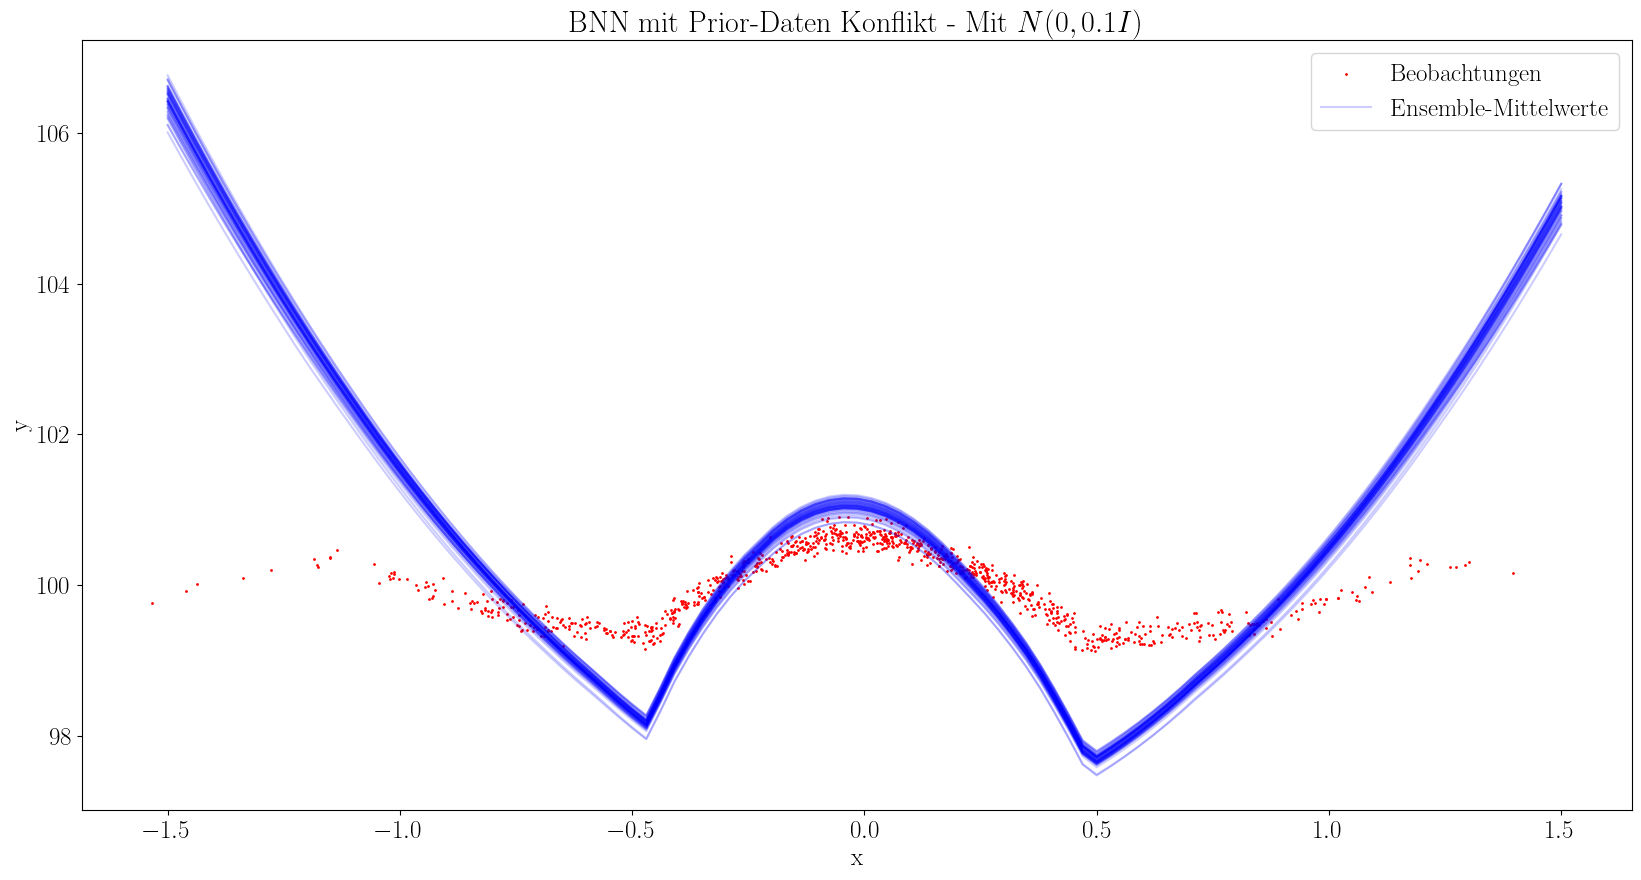

In [56]:
plt.figure(figsize=(20,10))
plt.scatter(X_pred[:,0], y_true, color="red", s=1, label="Beobachtungen")
plt.title(r"BNN mit Prior-Daten Konflikt - Mit $N(0, 0.1I)$")
plt.xlabel("x")
plt.ylabel("y")
for i in range(50):
    plt.plot(X_pred_[:,0], base_model(X_pred_).mean(), color= "blue", alpha = .2, label="Ensemble-Mittelwerte" if i == 0 else None)
plt.legend(loc="upper right")
plt.savefig("bilder/BNN_PDK_p1.png", dpi=1000, bbox_inches='tight')
plt.show()

Visualisierung der Gewichte des letzten (trainieren) Layers. Offensichtlich weist die Gewichte eine recht gute Anpassung auf. Allerdings unterscheiden sich viele doch wesentlich von den _optimalen_ Parametern

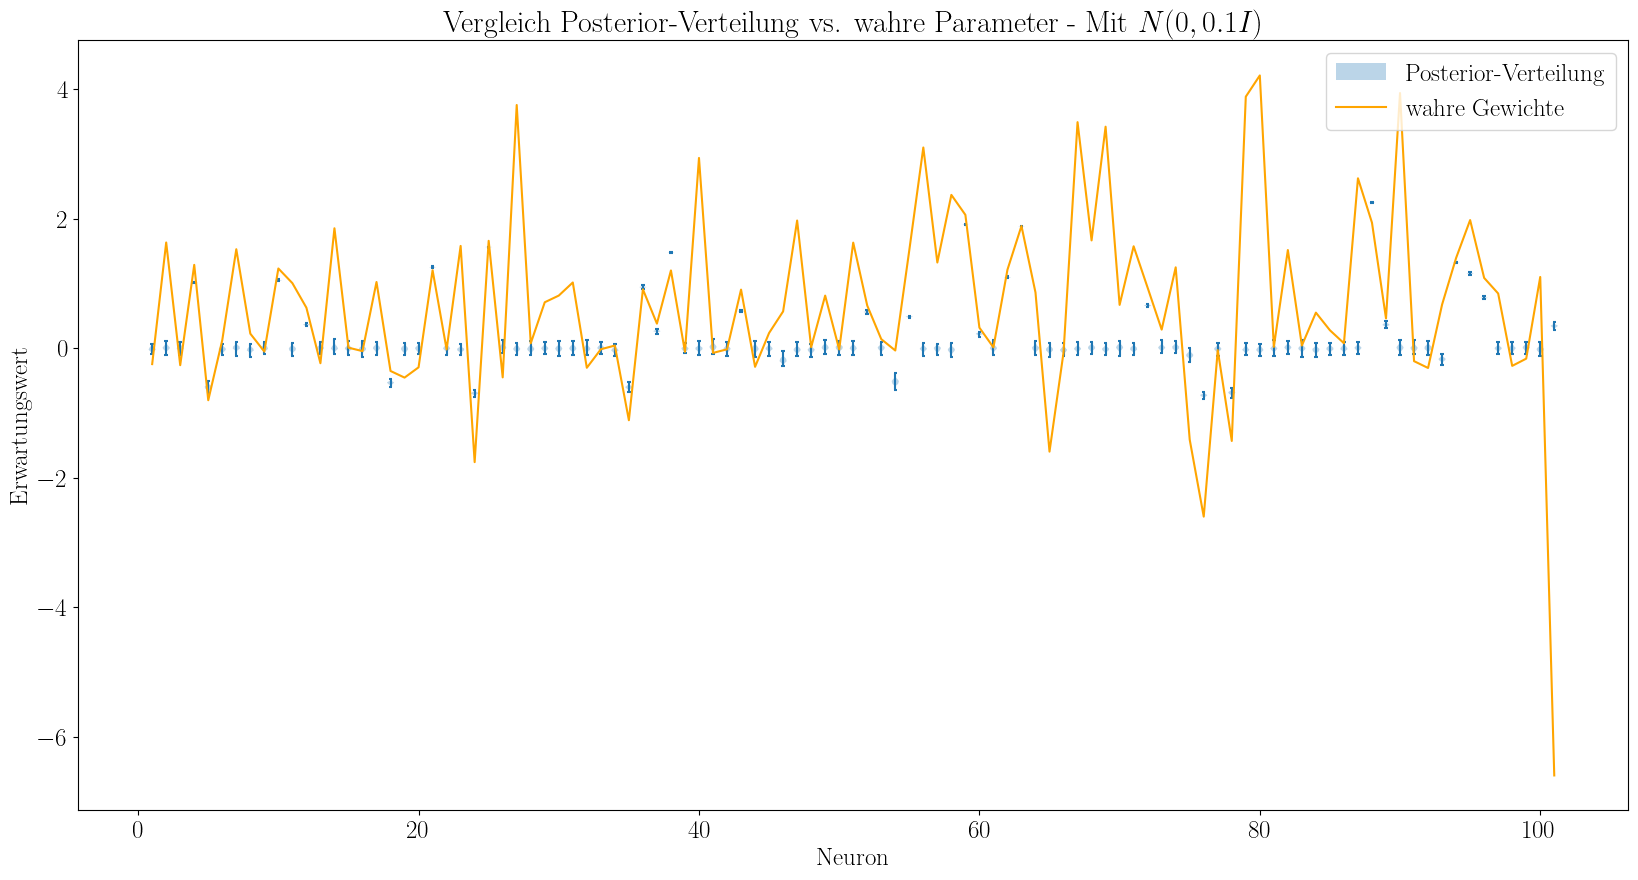

In [57]:
plt.figure(figsize=(20,10))
vp1 = plt.violinplot(np.array([np.random.normal(mean, sd, 1000) for mean, sd in zip(base_model.layers[4]._posterior(np.array([0])).mean().numpy(), base_model.layers[4]._posterior(np.array([0])).stddev().numpy())]).T)
sc1 = plt.plot(range(1, 102), np.hstack((k3.ravel(), b3.ravel())), label="wahre Gewichte", color = "orange")
plt.legend([vp1["bodies"][0], sc1[0]], ["Posterior-Verteilung", "wahre Gewichte"], loc="upper right")
plt.ylabel("Erwartungswert")
plt.xlabel("Neuron")
plt.title(r"Vergleich Posterior-Verteilung vs. wahre Parameter - Mit $N(0, 0.1I)$")
plt.savefig("bilder/BNN_PDK_p1_vergleich.png", dpi=1000, bbox_inches='tight')
plt.show()

#### Exakte Prior-Verteilungen

In [58]:
batch_size = 32

ideal_model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(3,)), 
    tfp.layers.DenseVariational(units=100, make_posterior_fn=posterior, make_prior_fn=prior_p1, kl_weight=kl_weight),
    tf.keras.layers.Activation("relu"),
    tfp.layers.DenseVariational(units=100, make_posterior_fn=posterior, make_prior_fn=prior_p1, kl_weight=kl_weight),
    tf.keras.layers.Activation("relu"),
    tfp.layers.DenseVariational(units=1, make_posterior_fn=posterior, make_prior_fn=prior_exact2_p1, kl_weight=kl_weight),
    tfp.layers.DistributionLambda(lambda t: tfp.distributions.Normal(loc = t, scale=.1))
])
ideal_model.build()

In [59]:
ideal_model.layers[0].trainable = False # erstes Layer
ideal_model.layers[2].trainable = False # zweites Layer
ideal_model.layers[4].trainable = True # drittes Layer

In [60]:
l_weights = ideal_model.get_weights()

In [61]:
l_weights

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

In [62]:
#l_weights[0] = np.hstack(( np.zeros_like(k1.ravel()), np.zeros_like(b1.ravel()), np.zeros_like(k1.ravel()), np.zeros_like(b1.ravel()) )) #layer 1
l_weights[0] = np.hstack((k1.ravel(), b1.ravel(), np.ones_like(k1.ravel()) * -8, np.ones_like(b1.ravel()) * -8))
l_weights[1] = np.hstack(( k2.ravel(), b2.ravel(), np.ones_like(k2.ravel()) * -8, np.ones_like(b2.ravel()) * -8)) #layer 2
#l_weights[1] = np.hstack(( np.zeros_like(k2.ravel()), np.zeros_like(b2.ravel()), np.zeros_like(k2.ravel()), np.zeros_like(b2.ravel()) ))
#l_weights[2] = np.hstack((k3.ravel(), b3.ravel(), np.ones_like(k3.ravel()) * -8, np.ones_like(b3.ravel()) * -8)) #layer 3
#l_weights[2] = np.hstack(( np.zeros_like(k1.ravel()), np.zeros_like(b1.ravel()), np.zeros_like(k1.ravel()), np.zeros_like(b1.ravel()) ))

In [63]:
ideal_model.set_weights(l_weights)

In [64]:
ideal_model.get_weights()

[array([-4.30271292e+00, -2.21631432e+00, -3.49136543e+00, -1.86284399e+00,
        -9.69548404e-01, -5.13113356e+00, -4.09472132e+00, -3.04192138e+00,
        -1.43777466e+00, -3.03250837e+00, -2.30099440e+00, -1.57960260e+00,
        -3.40350676e+00, -4.32710409e+00, -1.76832998e+00, -2.78641367e+00,
        -3.34683824e+00, -1.77741957e+00, -3.75351930e+00, -3.70130849e+00,
        -2.73898196e+00, -1.95191038e+00, -6.07484674e+00, -3.11906242e+00,
        -1.41751719e+00, -1.01366544e+00, -4.06156778e+00, -3.18250704e+00,
        -3.17134285e+00, -2.94432569e+00, -2.43019462e+00, -3.41155005e+00,
        -5.43070459e+00, -4.28355694e+00, -4.58833188e-01, -1.55069947e+00,
        -1.92430472e+00, -2.66420770e+00, -5.75587654e+00, -4.37354422e+00,
        -3.65071440e+00, -3.16548109e+00, -3.27952099e+00,  4.02829200e-01,
        -1.73192132e+00, -3.80281806e-02, -2.61196256e+00, -2.86512040e-02,
         1.27721041e-01, -5.75428867e+00, -2.71463180e+00, -1.90074623e+00,
        -5.9

In [65]:
cb = tf.keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=1e-4, patience = 500, mode = "min", verbose = 1)
ideal_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss = neg_log_like)
ideal_model.fit(X_pred, y_true, epochs = 10000, verbose = False, batch_size = batch_size, callbacks=cb, validation_split=.3)

Epoch 1319: early stopping


In [66]:
ideal_model.weights

[<tf.Variable 'dense_variational_9/posterior/constant:0' shape=(800,) dtype=float32, numpy=
 array([-4.30271292e+00, -2.21631432e+00, -3.49136543e+00, -1.86284399e+00,
        -9.69548404e-01, -5.13113356e+00, -4.09472132e+00, -3.04192138e+00,
        -1.43777466e+00, -3.03250837e+00, -2.30099440e+00, -1.57960260e+00,
        -3.40350676e+00, -4.32710409e+00, -1.76832998e+00, -2.78641367e+00,
        -3.34683824e+00, -1.77741957e+00, -3.75351930e+00, -3.70130849e+00,
        -2.73898196e+00, -1.95191038e+00, -6.07484674e+00, -3.11906242e+00,
        -1.41751719e+00, -1.01366544e+00, -4.06156778e+00, -3.18250704e+00,
        -3.17134285e+00, -2.94432569e+00, -2.43019462e+00, -3.41155005e+00,
        -5.43070459e+00, -4.28355694e+00, -4.58833188e-01, -1.55069947e+00,
        -1.92430472e+00, -2.66420770e+00, -5.75587654e+00, -4.37354422e+00,
        -3.65071440e+00, -3.16548109e+00, -3.27952099e+00,  4.02829200e-01,
        -1.73192132e+00, -3.80281806e-02, -2.61196256e+00, -2.86512040e-

In [67]:
X_pred_ = np.atleast_2d(np.linspace(-1.5,1.5, 100)).T
X_pred_ = np.hstack((X_pred_, X_pred_**2, X_pred_**3))


Visualisierung. Das Netz scheint sich bezüglich der funktionalen Form etwas sicherer zu sein. Die inherente Struktur der Daten wurde gelernt.

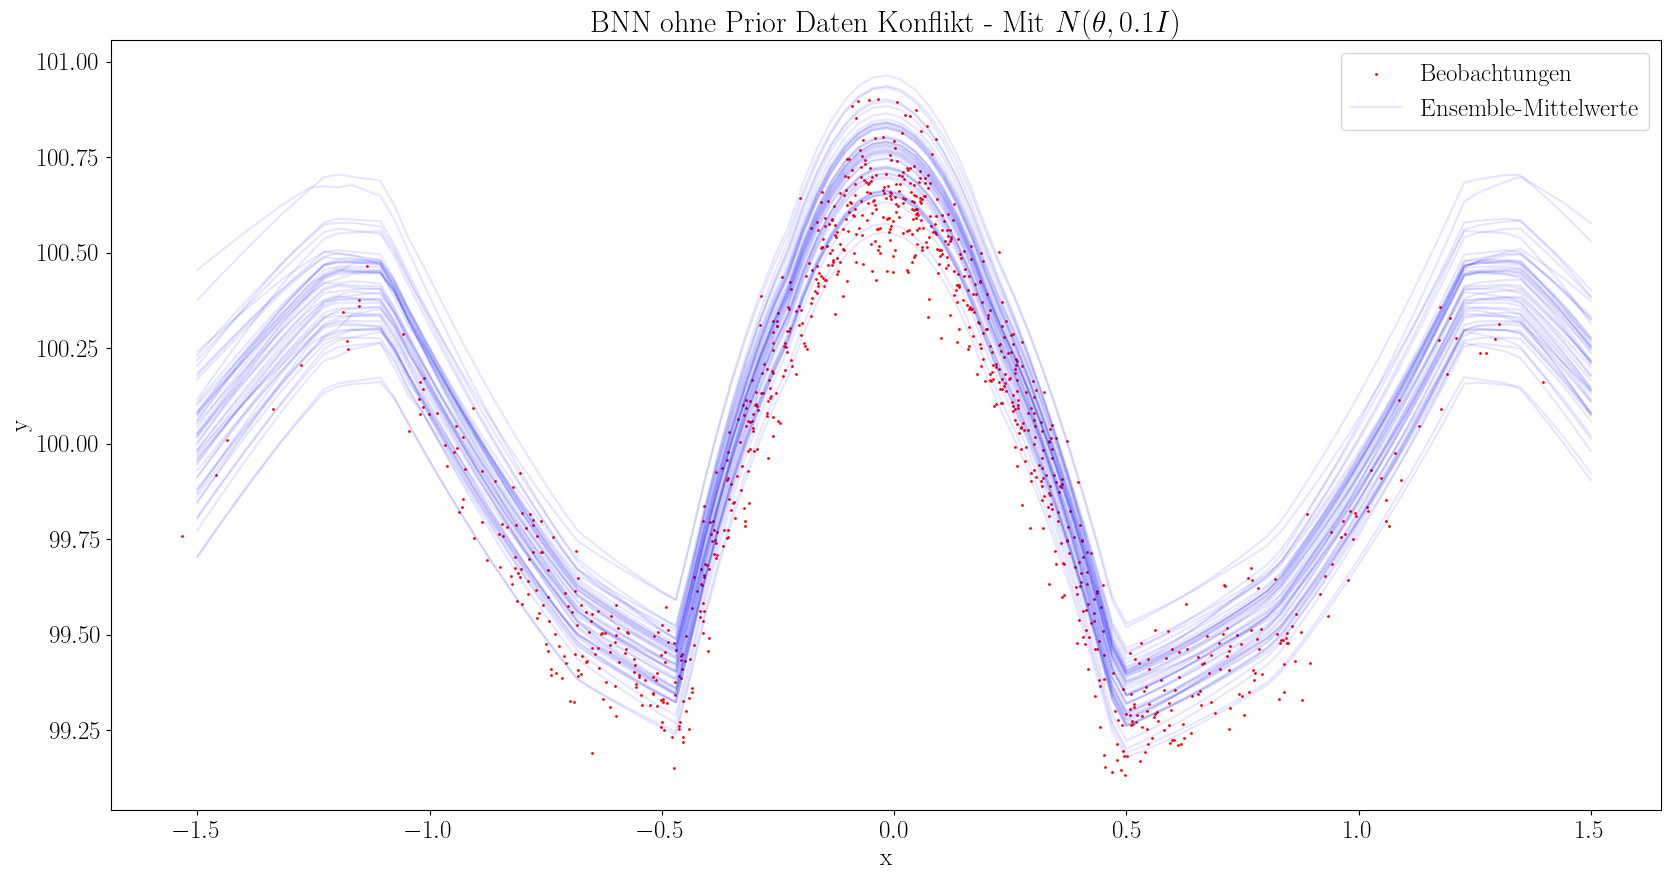

In [68]:
plt.figure(figsize=(20,10))
plt.scatter(X_pred[:,0], y_true, color="red", s=1, label="Beobachtungen")
plt.title(r"BNN ohne Prior Daten Konflikt - Mit $N(\theta, 0.1I)$")
plt.xlabel("x")
plt.ylabel("y")
for i in range(50):
    plt.plot(X_pred_[:,0], ideal_model(X_pred_).mean(), color= "blue", alpha = .1, label="Ensemble-Mittelwerte" if i == 0 else None)
plt.legend(loc="upper right")
plt.savefig("bilder/BNN_NPDK_p1.png", dpi=1000, bbox_inches='tight')
plt.show()

Die Gewichte sind deutlich näher an den tatsächlichen Gewichten. Durch die Spezifizierung der exakten Gewichten als Prior-Annahme konnten demnach die tatsächlichen Gewichte sehr gut gelernt werden.

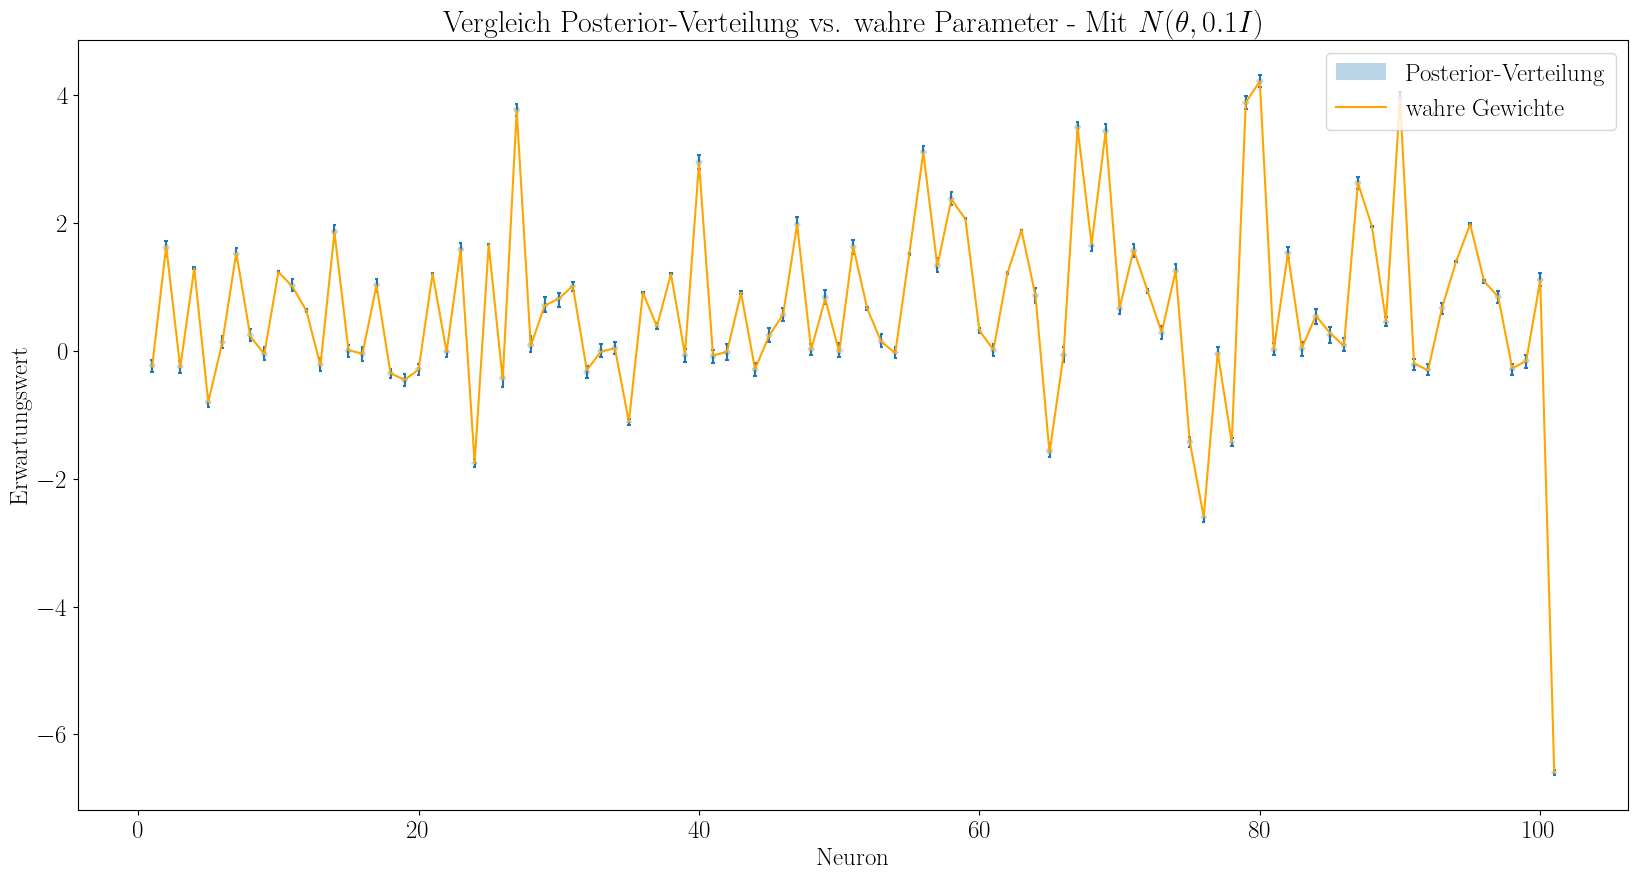

In [69]:
plt.figure(figsize=(20,10))
vp1 = plt.violinplot(np.array([np.random.normal(mean, sd, 1000) for mean, sd in zip(ideal_model.layers[4]._posterior(np.array([0])).mean().numpy(), ideal_model.layers[4]._posterior(np.array([0])).stddev().numpy())]).T)
sc1 = plt.plot(range(1, 102), np.hstack((k3.ravel(), b3.ravel())), label="wahre Gewichte", color = "orange")
plt.legend([vp1["bodies"][0], sc1[0]], ["Posterior-Verteilung", "wahre Gewichte"], loc="upper right")
plt.ylabel("Erwartungswert")
plt.xlabel("Neuron")
plt.title(r"Vergleich Posterior-Verteilung vs. wahre Parameter - Mit $N(\theta, 0.1I)$")
plt.savefig("bilder/BNN_NPDK_p1_vergleich.png", dpi=1000, bbox_inches='tight')
plt.show()

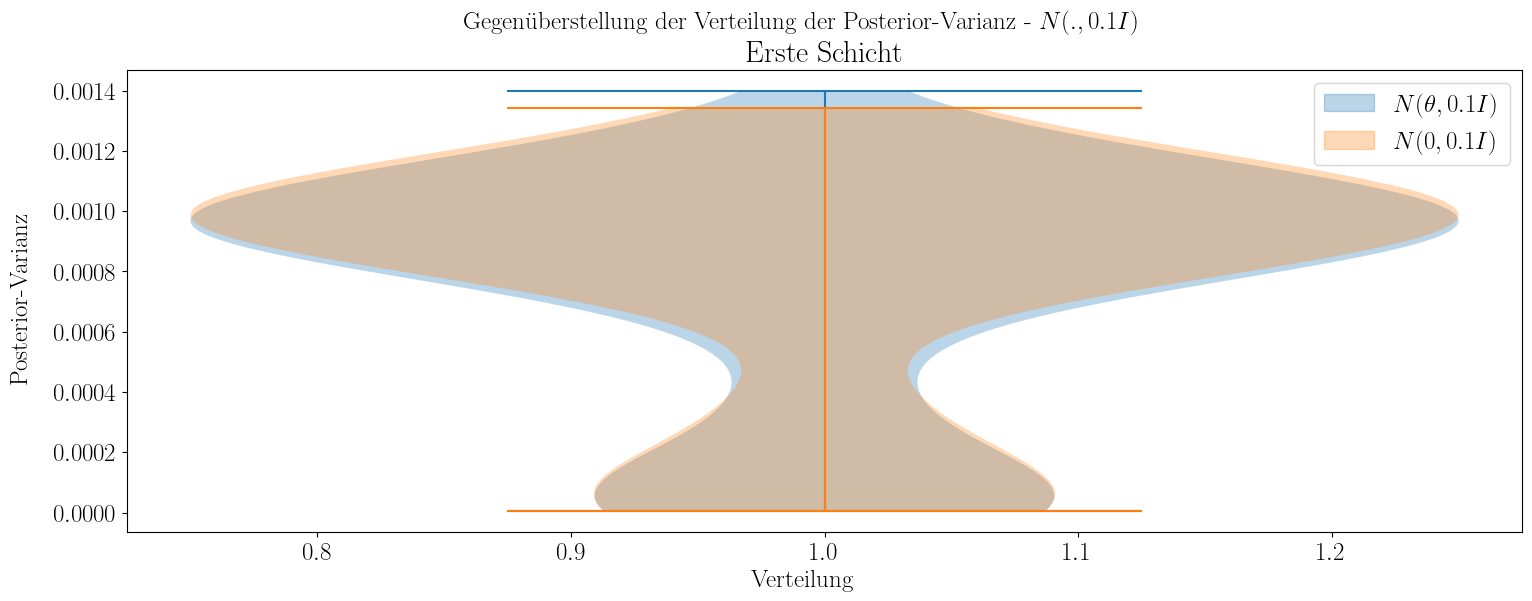

In [70]:
labels = []
fig, (ax1) = plt.subplots(1,1, figsize=(18, 6))
add_label(ax1.violinplot(np.power(ideal_model.layers[4]._posterior(np.array([0])).stddev().numpy(), 2)), r"$N(\theta, 0.1I)$")
add_label(ax1.violinplot(np.power(base_model.layers[4]._posterior(np.array([0])).stddev().numpy(), 2)), r"$N(0, 0.1I)$")
ax1.set_title("Erste Schicht")
ax1.legend(*zip(*labels), loc="upper right")
fig.text(0.5, .95, r"Gegenüberstellung der Verteilung der Posterior-Varianz - $N(., 0.1I)$", ha="center", fontsize=18)
fig.text(0.5, 0.02, 'Verteilung', ha='center')
fig.text(0.06, 0.5, 'Posterior-Varianz', va='center', rotation='vertical')
#plt.savefig("bilder/deep_bnn/dbnn_prior_I_gegenueb", dpi=1000, bbox_inches='tight')
plt.show()

### $N(0, 10I)$

#### Prior-Daten Konflikt

Bauen des Netzwerkes. Verwendet wird eine batchsize von 32, die Architektur des Netzwerkes ist äquivalent zur Architektur des NNs. <br>
Da es sich um ein Regressionsproblem handelt wird eine Normalverteilung modelliert mit fixer (aleatorischer) Varianz

In [71]:
batch_size = 32
kl_weight = 1/int(X_pred.shape[0]/32)

base_model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(3,)), 
    tfp.layers.DenseVariational(units=100, make_posterior_fn=posterior, make_prior_fn=prior_4, kl_weight=kl_weight),
    tf.keras.layers.Activation("relu"),
    tfp.layers.DenseVariational(units=100, make_posterior_fn=posterior, make_prior_fn=prior_4, kl_weight=kl_weight),
    tf.keras.layers.Activation("relu"),
    tfp.layers.DenseVariational(units=1, make_posterior_fn=posterior, make_prior_fn=prior_4, kl_weight=kl_weight),
    tfp.layers.DistributionLambda(lambda t: tfp.distributions.Normal(loc = t, scale=.1))
])
base_model.build()

Damit die Gewichte besser vergleichbar sind wird nur das dritte Layer trainiert. Die ersten beiden Layer werden fixiert und mit den exakten Gewichten des NNs initialisiert, wobei eine sehr geringe Varianz (0.002) spezifiziert wird. Das heißt das Netzwerk weist bezüglich dieser Parameter eine sehr hohe Sicherheit auf.

In [72]:
base_model.layers[0].trainable = False # erstes Layer
base_model.layers[2].trainable = False # zweites Layer
base_model.layers[4].trainable = True # drittes Layer

In [73]:
l_weights = base_model.get_weights()

In [74]:
#l_weights[0] = np.hstack(( np.zeros_like(k1.ravel()), np.zeros_like(b1.ravel()), np.zeros_like(k1.ravel()), np.zeros_like(b1.ravel()) )) #layer 1
l_weights[0] = np.hstack((k1.ravel(), b1.ravel(), np.ones_like(k1.ravel()) * -8, np.ones_like(b1.ravel()) * -8))
l_weights[1] = np.hstack(( k2.ravel(), b2.ravel(), np.ones_like(k2.ravel()) * -8, np.ones_like(b2.ravel()) * -8)) #layer 2
#l_weights[1] = np.hstack(( np.zeros_like(k2.ravel()), np.zeros_like(b2.ravel()), np.zeros_like(k2.ravel()), np.zeros_like(b2.ravel()) ))
#l_weights[2] = np.hstack((k3.ravel(), b3.ravel(), np.ones_like(k3.ravel()) * -8, np.ones_like(b3.ravel()) * -8)) #layer 3
#l_weights[2] = np.hstack(( np.zeros_like(k1.ravel()), np.zeros_like(b1.ravel()), np.zeros_like(k1.ravel()), np.zeros_like(b1.ravel()) ))

In [75]:
base_model.set_weights(l_weights)

In [76]:
base_model.get_weights()

[array([-4.30271292e+00, -2.21631432e+00, -3.49136543e+00, -1.86284399e+00,
        -9.69548404e-01, -5.13113356e+00, -4.09472132e+00, -3.04192138e+00,
        -1.43777466e+00, -3.03250837e+00, -2.30099440e+00, -1.57960260e+00,
        -3.40350676e+00, -4.32710409e+00, -1.76832998e+00, -2.78641367e+00,
        -3.34683824e+00, -1.77741957e+00, -3.75351930e+00, -3.70130849e+00,
        -2.73898196e+00, -1.95191038e+00, -6.07484674e+00, -3.11906242e+00,
        -1.41751719e+00, -1.01366544e+00, -4.06156778e+00, -3.18250704e+00,
        -3.17134285e+00, -2.94432569e+00, -2.43019462e+00, -3.41155005e+00,
        -5.43070459e+00, -4.28355694e+00, -4.58833188e-01, -1.55069947e+00,
        -1.92430472e+00, -2.66420770e+00, -5.75587654e+00, -4.37354422e+00,
        -3.65071440e+00, -3.16548109e+00, -3.27952099e+00,  4.02829200e-01,
        -1.73192132e+00, -3.80281806e-02, -2.61196256e+00, -2.86512040e-02,
         1.27721041e-01, -5.75428867e+00, -2.71463180e+00, -1.90074623e+00,
        -5.9

Ausführen des Modells. Es wird EarlyStopping mit einer Patience von 500 verwendet um sicherzugehen, dass das Netzwerk konvergiert ist und gleichzeitig den Rechenaufwand zu reduzieren.

In [77]:
cb = tf.keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=1e-4, patience = 500, mode = "min", verbose = 1)
base_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss = neg_log_like)
base_model.fit(X_pred, y_true, epochs = 10000, verbose = False, batch_size = batch_size, callbacks=cb, validation_split=.3)

Epoch 2400: early stopping


Finale Gewichte des Modells. Die ersten beiden Layer sind konstant geblieben und weisen die exakten Gewichte des NNs auf

In [78]:
base_model.weights

[<tf.Variable 'dense_variational_12/posterior/constant:0' shape=(800,) dtype=float32, numpy=
 array([-4.30271292e+00, -2.21631432e+00, -3.49136543e+00, -1.86284399e+00,
        -9.69548404e-01, -5.13113356e+00, -4.09472132e+00, -3.04192138e+00,
        -1.43777466e+00, -3.03250837e+00, -2.30099440e+00, -1.57960260e+00,
        -3.40350676e+00, -4.32710409e+00, -1.76832998e+00, -2.78641367e+00,
        -3.34683824e+00, -1.77741957e+00, -3.75351930e+00, -3.70130849e+00,
        -2.73898196e+00, -1.95191038e+00, -6.07484674e+00, -3.11906242e+00,
        -1.41751719e+00, -1.01366544e+00, -4.06156778e+00, -3.18250704e+00,
        -3.17134285e+00, -2.94432569e+00, -2.43019462e+00, -3.41155005e+00,
        -5.43070459e+00, -4.28355694e+00, -4.58833188e-01, -1.55069947e+00,
        -1.92430472e+00, -2.66420770e+00, -5.75587654e+00, -4.37354422e+00,
        -3.65071440e+00, -3.16548109e+00, -3.27952099e+00,  4.02829200e-01,
        -1.73192132e+00, -3.80281806e-02, -2.61196256e+00, -2.86512040e

In [79]:
X_pred_ = np.atleast_2d(np.linspace(-1.5,1.5, 100)).T
X_pred_ = np.hstack((X_pred_, X_pred_**2, X_pred_**3))


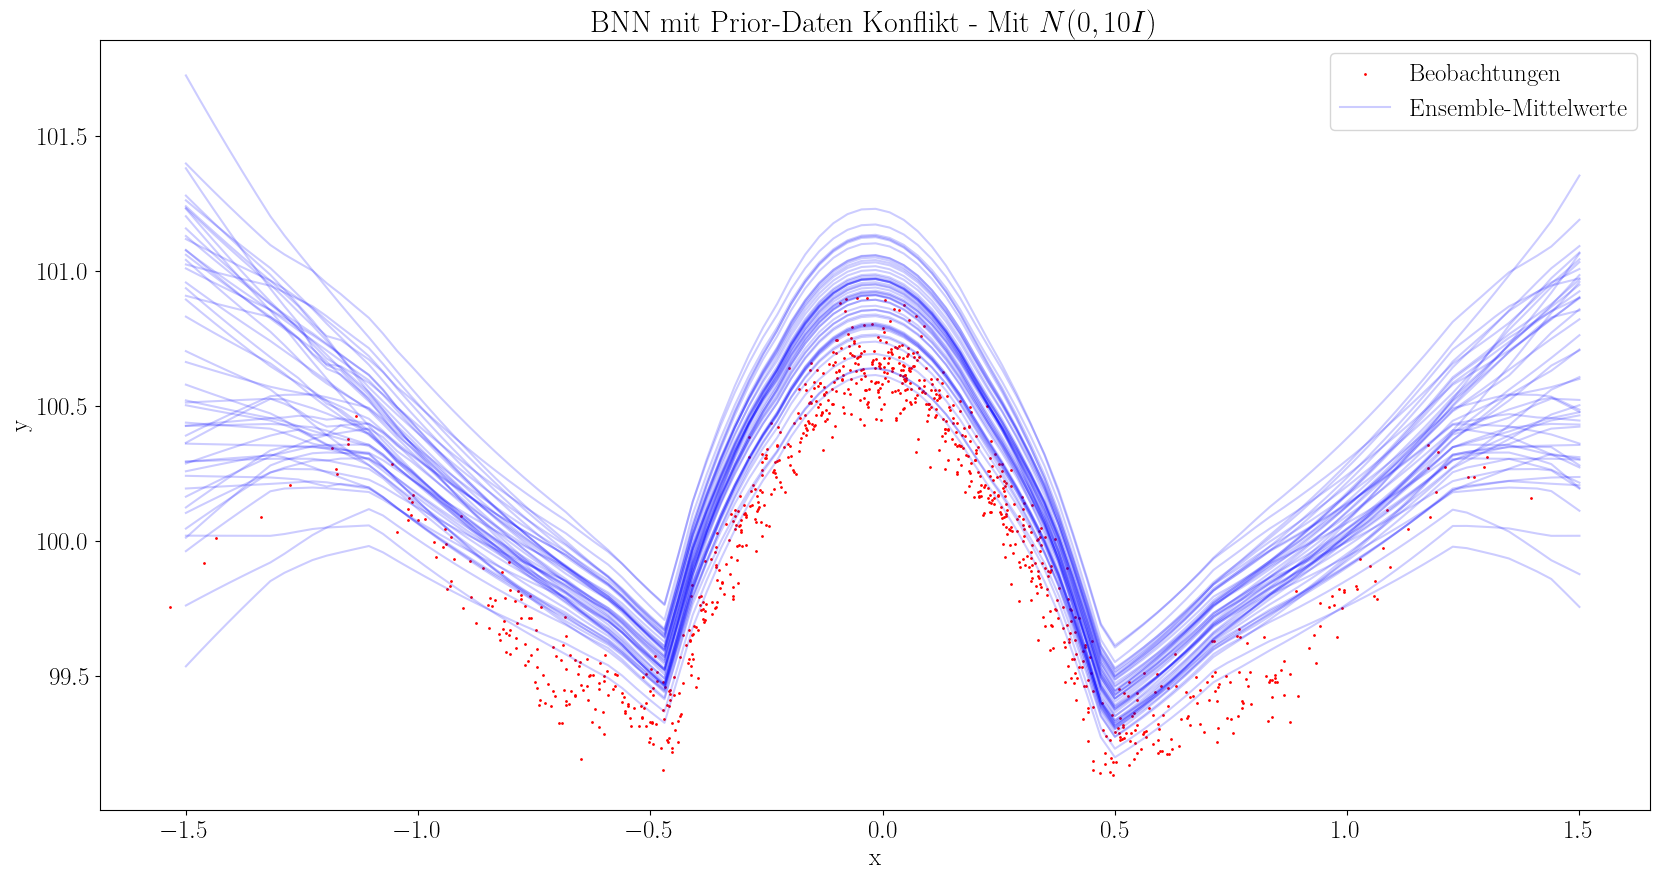

In [80]:
plt.figure(figsize=(20,10))
plt.scatter(X_pred[:,0], y_true, color="red", s=1, label="Beobachtungen")
plt.title(r"BNN mit Prior-Daten Konflikt - Mit $N(0, 10I)$")
plt.xlabel("x")
plt.ylabel("y")
for i in range(50):
    plt.plot(X_pred_[:,0], base_model(X_pred_).mean(), color= "blue", alpha = .2, label="Ensemble-Mittelwerte" if i == 0 else None)
plt.legend(loc="upper right")
plt.savefig("bilder/BNN_PDK_4.png", dpi=1000, bbox_inches='tight')
plt.show()

Visualisierung der Gewichte des letzten (trainieren) Layers. Offensichtlich weist die Gewichte eine recht gute Anpassung auf. Allerdings unterscheiden sich viele doch wesentlich von den _optimalen_ Parametern

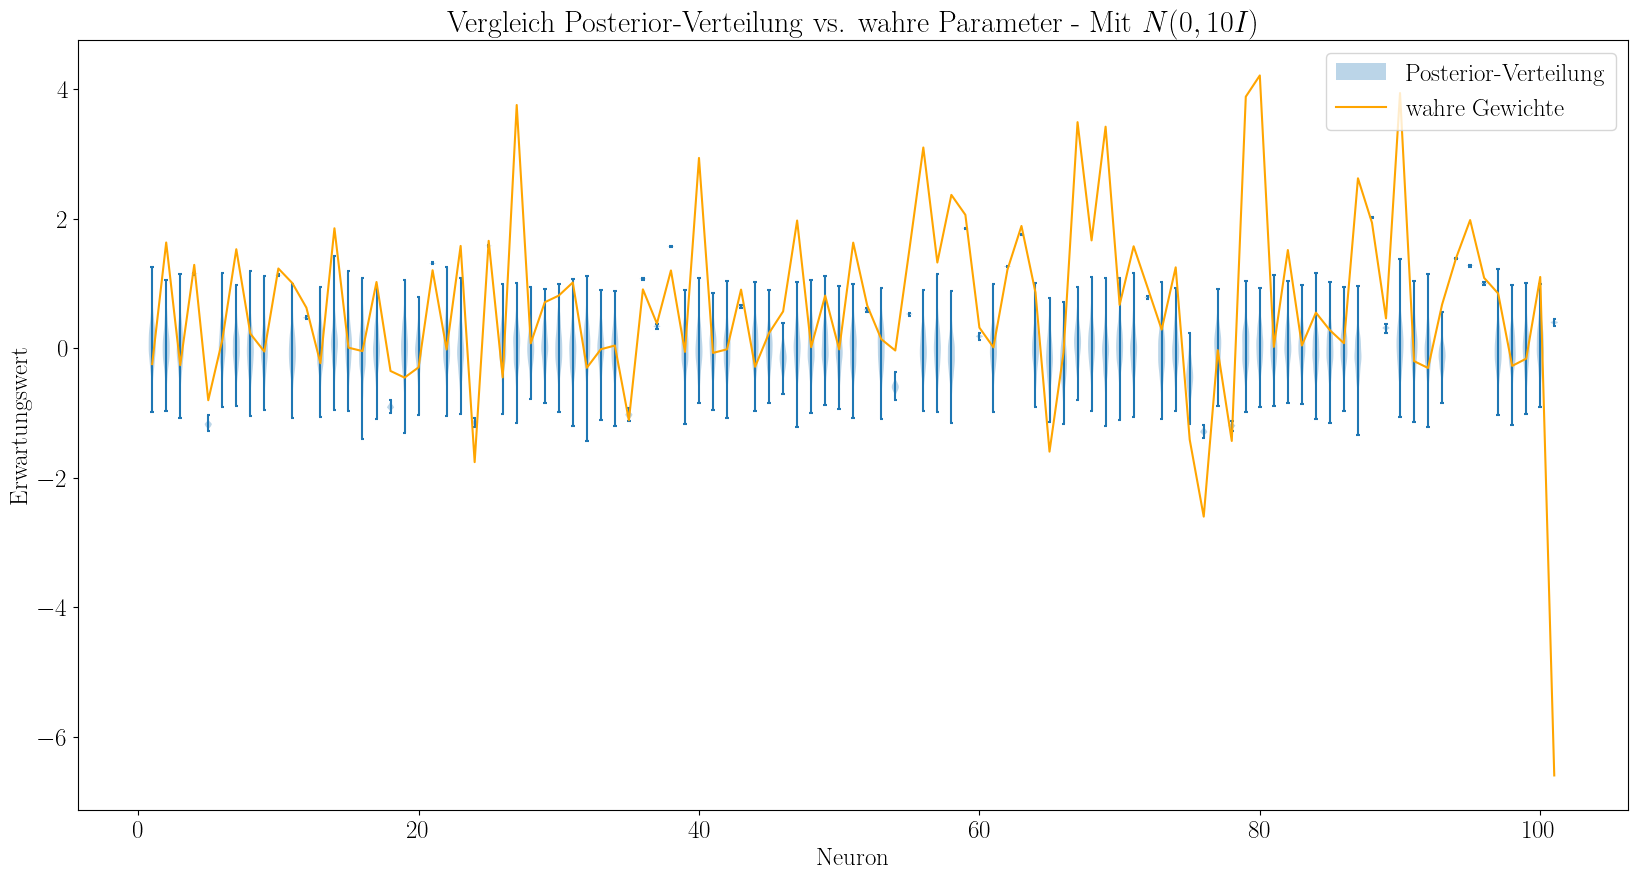

In [81]:
plt.figure(figsize=(20,10))
vp1 = plt.violinplot(np.array([np.random.normal(mean, sd, 1000) for mean, sd in zip(base_model.layers[4]._posterior(np.array([0])).mean().numpy(), base_model.layers[4]._posterior(np.array([0])).stddev().numpy())]).T)
sc1 = plt.plot(range(1, 102), np.hstack((k3.ravel(), b3.ravel())), label="wahre Gewichte", color = "orange")
plt.legend([vp1["bodies"][0], sc1[0]], ["Posterior-Verteilung", "wahre Gewichte"], loc="upper right")
plt.ylabel("Erwartungswert")
plt.xlabel("Neuron")
plt.title(r"Vergleich Posterior-Verteilung vs. wahre Parameter - Mit $N(0, 10I)$")
plt.savefig("bilder/BNN_PDK_4_vergleich.png", dpi=1000, bbox_inches='tight')
plt.show()

#### Exakte Prior-Verteilungen

In [82]:
batch_size = 32

ideal_model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(3,)), 
    tfp.layers.DenseVariational(units=100, make_posterior_fn=posterior, make_prior_fn=prior_4, kl_weight=kl_weight),
    tf.keras.layers.Activation("relu"),
    tfp.layers.DenseVariational(units=100, make_posterior_fn=posterior, make_prior_fn=prior_4, kl_weight=kl_weight),
    tf.keras.layers.Activation("relu"),
    tfp.layers.DenseVariational(units=1, make_posterior_fn=posterior, make_prior_fn=prior_exact2_4, kl_weight=kl_weight),
    tfp.layers.DistributionLambda(lambda t: tfp.distributions.Normal(loc = t, scale=.1))
])
ideal_model.build()

In [83]:
ideal_model.layers[0].trainable = False # erstes Layer
ideal_model.layers[2].trainable = False # zweites Layer
ideal_model.layers[4].trainable = True # drittes Layer

In [84]:
l_weights = ideal_model.get_weights()

In [85]:
l_weights

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

In [86]:
#l_weights[0] = np.hstack(( np.zeros_like(k1.ravel()), np.zeros_like(b1.ravel()), np.zeros_like(k1.ravel()), np.zeros_like(b1.ravel()) )) #layer 1
l_weights[0] = np.hstack((k1.ravel(), b1.ravel(), np.ones_like(k1.ravel()) * -8, np.ones_like(b1.ravel()) * -8))
l_weights[1] = np.hstack(( k2.ravel(), b2.ravel(), np.ones_like(k2.ravel()) * -8, np.ones_like(b2.ravel()) * -8)) #layer 2
#l_weights[1] = np.hstack(( np.zeros_like(k2.ravel()), np.zeros_like(b2.ravel()), np.zeros_like(k2.ravel()), np.zeros_like(b2.ravel()) ))
#l_weights[2] = np.hstack((k3.ravel(), b3.ravel(), np.ones_like(k3.ravel()) * -8, np.ones_like(b3.ravel()) * -8)) #layer 3
#l_weights[2] = np.hstack(( np.zeros_like(k1.ravel()), np.zeros_like(b1.ravel()), np.zeros_like(k1.ravel()), np.zeros_like(b1.ravel()) ))

In [87]:
ideal_model.set_weights(l_weights)

In [88]:
ideal_model.get_weights()

[array([-4.30271292e+00, -2.21631432e+00, -3.49136543e+00, -1.86284399e+00,
        -9.69548404e-01, -5.13113356e+00, -4.09472132e+00, -3.04192138e+00,
        -1.43777466e+00, -3.03250837e+00, -2.30099440e+00, -1.57960260e+00,
        -3.40350676e+00, -4.32710409e+00, -1.76832998e+00, -2.78641367e+00,
        -3.34683824e+00, -1.77741957e+00, -3.75351930e+00, -3.70130849e+00,
        -2.73898196e+00, -1.95191038e+00, -6.07484674e+00, -3.11906242e+00,
        -1.41751719e+00, -1.01366544e+00, -4.06156778e+00, -3.18250704e+00,
        -3.17134285e+00, -2.94432569e+00, -2.43019462e+00, -3.41155005e+00,
        -5.43070459e+00, -4.28355694e+00, -4.58833188e-01, -1.55069947e+00,
        -1.92430472e+00, -2.66420770e+00, -5.75587654e+00, -4.37354422e+00,
        -3.65071440e+00, -3.16548109e+00, -3.27952099e+00,  4.02829200e-01,
        -1.73192132e+00, -3.80281806e-02, -2.61196256e+00, -2.86512040e-02,
         1.27721041e-01, -5.75428867e+00, -2.71463180e+00, -1.90074623e+00,
        -5.9

In [89]:
cb = tf.keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=1e-4, patience = 500, mode = "min", verbose = 1)
ideal_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss = neg_log_like)
ideal_model.fit(X_pred, y_true, epochs = 10000, verbose = False, batch_size = batch_size, callbacks=cb, validation_split=.3)

Epoch 2248: early stopping


In [90]:
ideal_model.weights

[<tf.Variable 'dense_variational_15/posterior/constant:0' shape=(800,) dtype=float32, numpy=
 array([-4.30271292e+00, -2.21631432e+00, -3.49136543e+00, -1.86284399e+00,
        -9.69548404e-01, -5.13113356e+00, -4.09472132e+00, -3.04192138e+00,
        -1.43777466e+00, -3.03250837e+00, -2.30099440e+00, -1.57960260e+00,
        -3.40350676e+00, -4.32710409e+00, -1.76832998e+00, -2.78641367e+00,
        -3.34683824e+00, -1.77741957e+00, -3.75351930e+00, -3.70130849e+00,
        -2.73898196e+00, -1.95191038e+00, -6.07484674e+00, -3.11906242e+00,
        -1.41751719e+00, -1.01366544e+00, -4.06156778e+00, -3.18250704e+00,
        -3.17134285e+00, -2.94432569e+00, -2.43019462e+00, -3.41155005e+00,
        -5.43070459e+00, -4.28355694e+00, -4.58833188e-01, -1.55069947e+00,
        -1.92430472e+00, -2.66420770e+00, -5.75587654e+00, -4.37354422e+00,
        -3.65071440e+00, -3.16548109e+00, -3.27952099e+00,  4.02829200e-01,
        -1.73192132e+00, -3.80281806e-02, -2.61196256e+00, -2.86512040e

In [91]:
X_pred_ = np.atleast_2d(np.linspace(-1.5,1.5, 100)).T
X_pred_ = np.hstack((X_pred_, X_pred_**2, X_pred_**3))


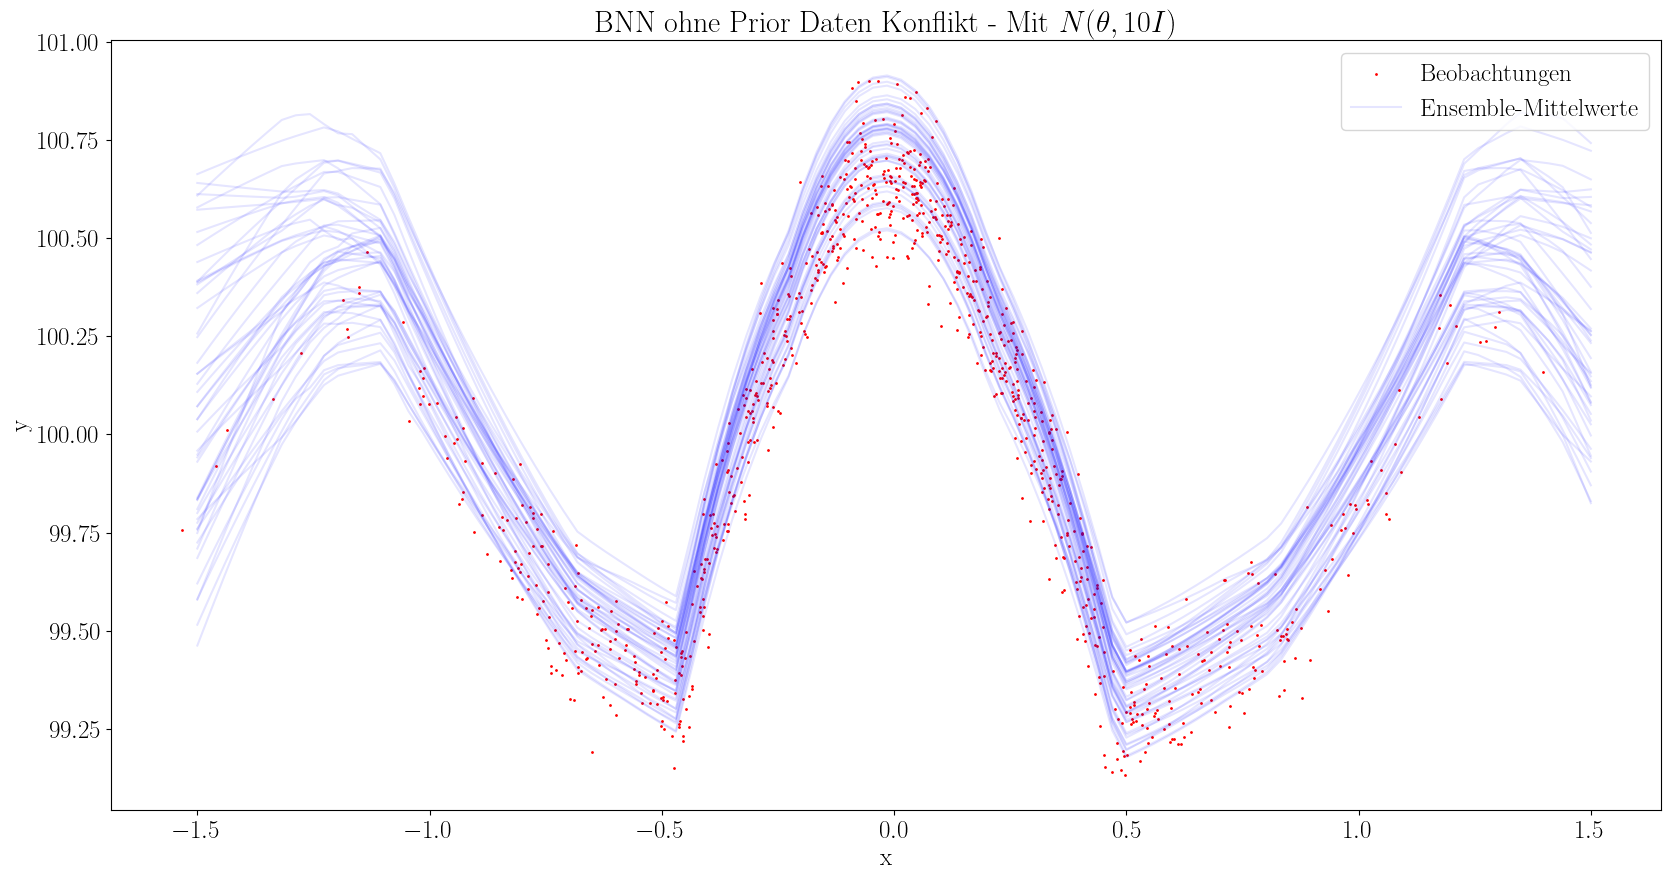

In [92]:
plt.figure(figsize=(20,10))
plt.scatter(X_pred[:,0], y_true, color="red", s=1, label="Beobachtungen")
plt.title(r"BNN ohne Prior Daten Konflikt - Mit $N(\theta, 10I)$")
plt.xlabel("x")
plt.ylabel("y")
for i in range(50):
    plt.plot(X_pred_[:,0], ideal_model(X_pred_).mean(), color= "blue", alpha = .1, label="Ensemble-Mittelwerte" if i == 0 else None)
plt.legend(loc="upper right")
plt.savefig("bilder/BNN_NPDK_4.png", dpi=1000, bbox_inches='tight')
plt.show()

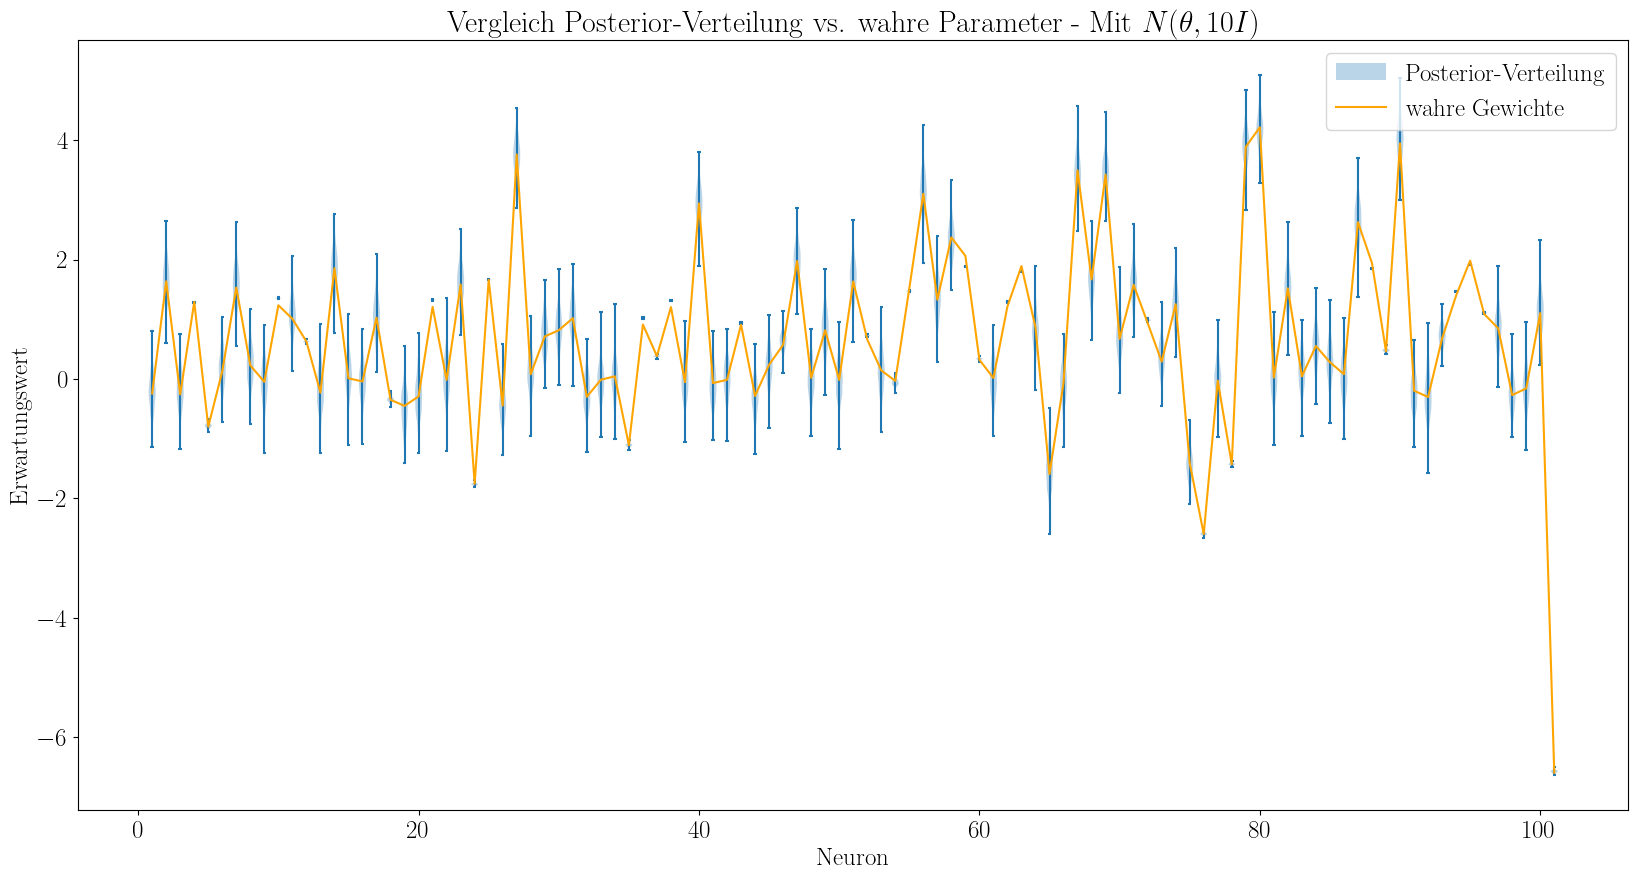

In [93]:
plt.figure(figsize=(20,10))
vp1 = plt.violinplot(np.array([np.random.normal(mean, sd, 1000) for mean, sd in zip(ideal_model.layers[4]._posterior(np.array([0])).mean().numpy(), ideal_model.layers[4]._posterior(np.array([0])).stddev().numpy())]).T)
sc1 = plt.plot(range(1, 102), np.hstack((k3.ravel(), b3.ravel())), label="wahre Gewichte", color = "orange")
plt.legend([vp1["bodies"][0], sc1[0]], ["Posterior-Verteilung", "wahre Gewichte"], loc="upper right")
plt.ylabel("Erwartungswert")
plt.xlabel("Neuron")
plt.title(r"Vergleich Posterior-Verteilung vs. wahre Parameter - Mit $N(\theta, 10I)$")
plt.savefig("bilder/BNN_NPDK_4_vergleich.png", dpi=1000, bbox_inches='tight')
plt.show()

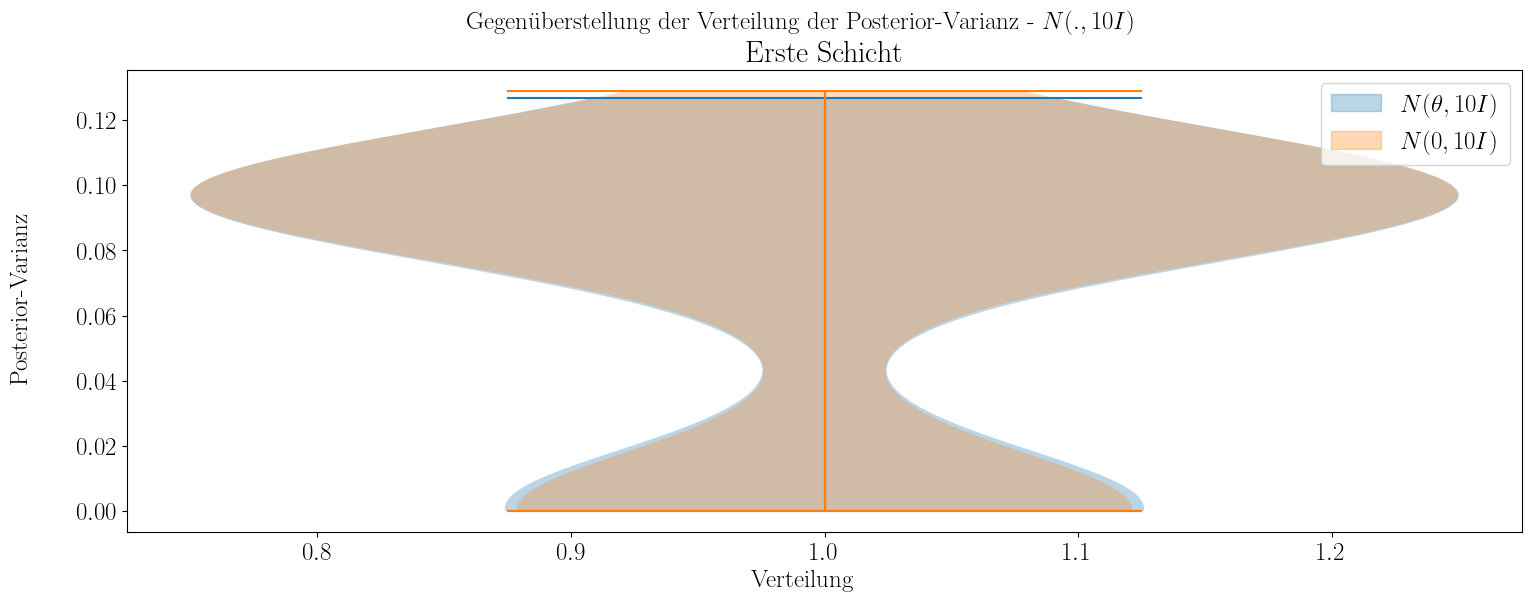

In [94]:
labels = []
fig, (ax1) = plt.subplots(1,1, figsize=(18, 6))
add_label(ax1.violinplot(np.power(ideal_model.layers[4]._posterior(np.array([0])).stddev().numpy(), 2)), r"$N(\theta, 10I)$")
add_label(ax1.violinplot(np.power(base_model.layers[4]._posterior(np.array([0])).stddev().numpy(), 2)), r"$N(0, 10I)$")
ax1.set_title("Erste Schicht")
ax1.legend(*zip(*labels), loc="upper right")
fig.text(0.5, .95, r"Gegenüberstellung der Verteilung der Posterior-Varianz - $N(., 10I)$", ha="center", fontsize=18)
fig.text(0.5, 0.02, 'Verteilung', ha='center')
fig.text(0.06, 0.5, 'Posterior-Varianz', va='center', rotation='vertical')
#plt.savefig("bilder/deep_bnn/dbnn_prior_I_gegenueb", dpi=1000, bbox_inches='tight')
plt.show()

In [95]:
# Use previous weights as ground truth
aleatoric_noise = .1

X_pred2 = np.atleast_2d(np.random.normal(0, .5, size = (20000,))).T
X_pred2 = np.hstack((X_pred2, X_pred2 ** 2, X_pred2 ** 3))
y_true2 = np.random.normal(model(X_pred2), aleatoric_noise)

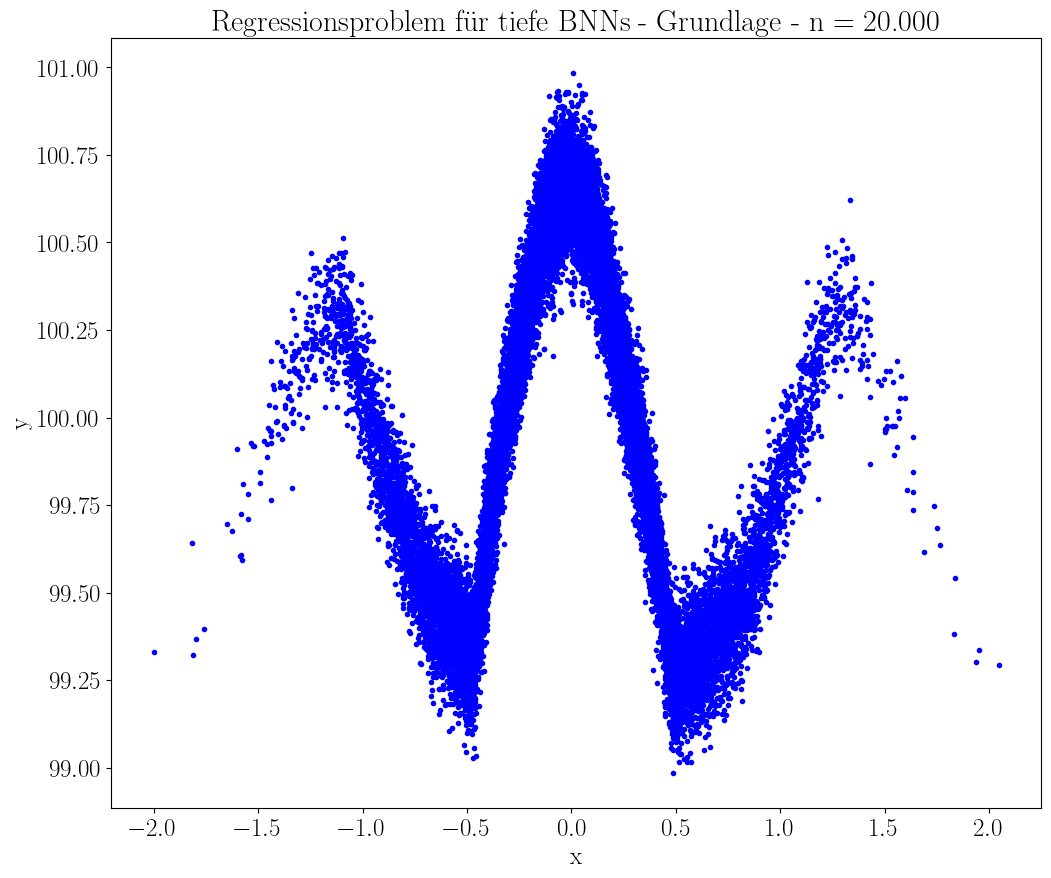

In [96]:
plt.figure(figsize=(12,10))
plt.plot(X_pred2[:,0], y_true2, "b.")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regressionsproblem für tiefe BNNs - Grundlage - n = 20.000")
plt.show()

In [97]:
batch_size = 32
kl_weight = 1/int(X_pred.shape[0]/32)

base_model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(3,)), 
    tfp.layers.DenseVariational(units=100, make_posterior_fn=posterior, make_prior_fn=prior_base, kl_weight=kl_weight),
    tf.keras.layers.Activation("relu"),
    tfp.layers.DenseVariational(units=100, make_posterior_fn=posterior, make_prior_fn=prior_base, kl_weight=kl_weight),
    tf.keras.layers.Activation("relu"),
    tfp.layers.DenseVariational(units=1, make_posterior_fn=posterior, make_prior_fn=prior_base, kl_weight=kl_weight),
    tfp.layers.DistributionLambda(lambda t: tfp.distributions.Normal(loc = t, scale=.1))
])
base_model.build()

In [98]:
base_model.layers[0].trainable = False # erstes Layer
base_model.layers[2].trainable = False # zweites Layer
base_model.layers[4].trainable = True # drittes Layer

In [99]:
l_weights = base_model.get_weights()

In [100]:
#l_weights[0] = np.hstack(( np.zeros_like(k1.ravel()), np.zeros_like(b1.ravel()), np.zeros_like(k1.ravel()), np.zeros_like(b1.ravel()) )) #layer 1
l_weights[0] = np.hstack((k1.ravel(), b1.ravel(), np.ones_like(k1.ravel()) * -8, np.ones_like(b1.ravel()) * -8))
l_weights[1] = np.hstack(( k2.ravel(), b2.ravel(), np.ones_like(k2.ravel()) * -8, np.ones_like(b2.ravel()) * -8)) #layer 2
#l_weights[1] = np.hstack(( np.zeros_like(k2.ravel()), np.zeros_like(b2.ravel()), np.zeros_like(k2.ravel()), np.zeros_like(b2.ravel()) ))
#l_weights[2] = np.hstack((k3.ravel(), b3.ravel(), np.ones_like(k3.ravel()) * -8, np.ones_like(b3.ravel()) * -8)) #layer 3
#l_weights[2] = np.hstack(( np.zeros_like(k1.ravel()), np.zeros_like(b1.ravel()), np.zeros_like(k1.ravel()), np.zeros_like(b1.ravel()) ))

In [101]:
base_model.set_weights(l_weights)

In [102]:
base_model.get_weights()

[array([-4.30271292e+00, -2.21631432e+00, -3.49136543e+00, -1.86284399e+00,
        -9.69548404e-01, -5.13113356e+00, -4.09472132e+00, -3.04192138e+00,
        -1.43777466e+00, -3.03250837e+00, -2.30099440e+00, -1.57960260e+00,
        -3.40350676e+00, -4.32710409e+00, -1.76832998e+00, -2.78641367e+00,
        -3.34683824e+00, -1.77741957e+00, -3.75351930e+00, -3.70130849e+00,
        -2.73898196e+00, -1.95191038e+00, -6.07484674e+00, -3.11906242e+00,
        -1.41751719e+00, -1.01366544e+00, -4.06156778e+00, -3.18250704e+00,
        -3.17134285e+00, -2.94432569e+00, -2.43019462e+00, -3.41155005e+00,
        -5.43070459e+00, -4.28355694e+00, -4.58833188e-01, -1.55069947e+00,
        -1.92430472e+00, -2.66420770e+00, -5.75587654e+00, -4.37354422e+00,
        -3.65071440e+00, -3.16548109e+00, -3.27952099e+00,  4.02829200e-01,
        -1.73192132e+00, -3.80281806e-02, -2.61196256e+00, -2.86512040e-02,
         1.27721041e-01, -5.75428867e+00, -2.71463180e+00, -1.90074623e+00,
        -5.9

Ausführen des Modells. Es wird EarlyStopping mit einer Patience von 500 verwendet um sicherzugehen, dass das Netzwerk konvergiert ist und gleichzeitig den Rechenaufwand zu reduzieren.

In [103]:
cb = tf.keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=1e-4, patience = 500, mode = "min", verbose = 1)
base_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss = neg_log_like)
base_model.fit(X_pred2, y_true2, epochs = 10000, verbose = False, batch_size = batch_size, callbacks=cb, validation_split=.3)

Epoch 614: early stopping


Finale Gewichte des Modells. Die ersten beiden Layer sind konstant geblieben und weisen die exakten Gewichte des NNs auf

In [104]:
base_model.weights

[<tf.Variable 'dense_variational_18/posterior/constant:0' shape=(800,) dtype=float32, numpy=
 array([-4.30271292e+00, -2.21631432e+00, -3.49136543e+00, -1.86284399e+00,
        -9.69548404e-01, -5.13113356e+00, -4.09472132e+00, -3.04192138e+00,
        -1.43777466e+00, -3.03250837e+00, -2.30099440e+00, -1.57960260e+00,
        -3.40350676e+00, -4.32710409e+00, -1.76832998e+00, -2.78641367e+00,
        -3.34683824e+00, -1.77741957e+00, -3.75351930e+00, -3.70130849e+00,
        -2.73898196e+00, -1.95191038e+00, -6.07484674e+00, -3.11906242e+00,
        -1.41751719e+00, -1.01366544e+00, -4.06156778e+00, -3.18250704e+00,
        -3.17134285e+00, -2.94432569e+00, -2.43019462e+00, -3.41155005e+00,
        -5.43070459e+00, -4.28355694e+00, -4.58833188e-01, -1.55069947e+00,
        -1.92430472e+00, -2.66420770e+00, -5.75587654e+00, -4.37354422e+00,
        -3.65071440e+00, -3.16548109e+00, -3.27952099e+00,  4.02829200e-01,
        -1.73192132e+00, -3.80281806e-02, -2.61196256e+00, -2.86512040e

In [105]:
X_pred_2 = np.atleast_2d(np.linspace(-2, 2, 100)).T
X_pred_2 = np.hstack((X_pred_2, X_pred_2**2, X_pred_2**3))


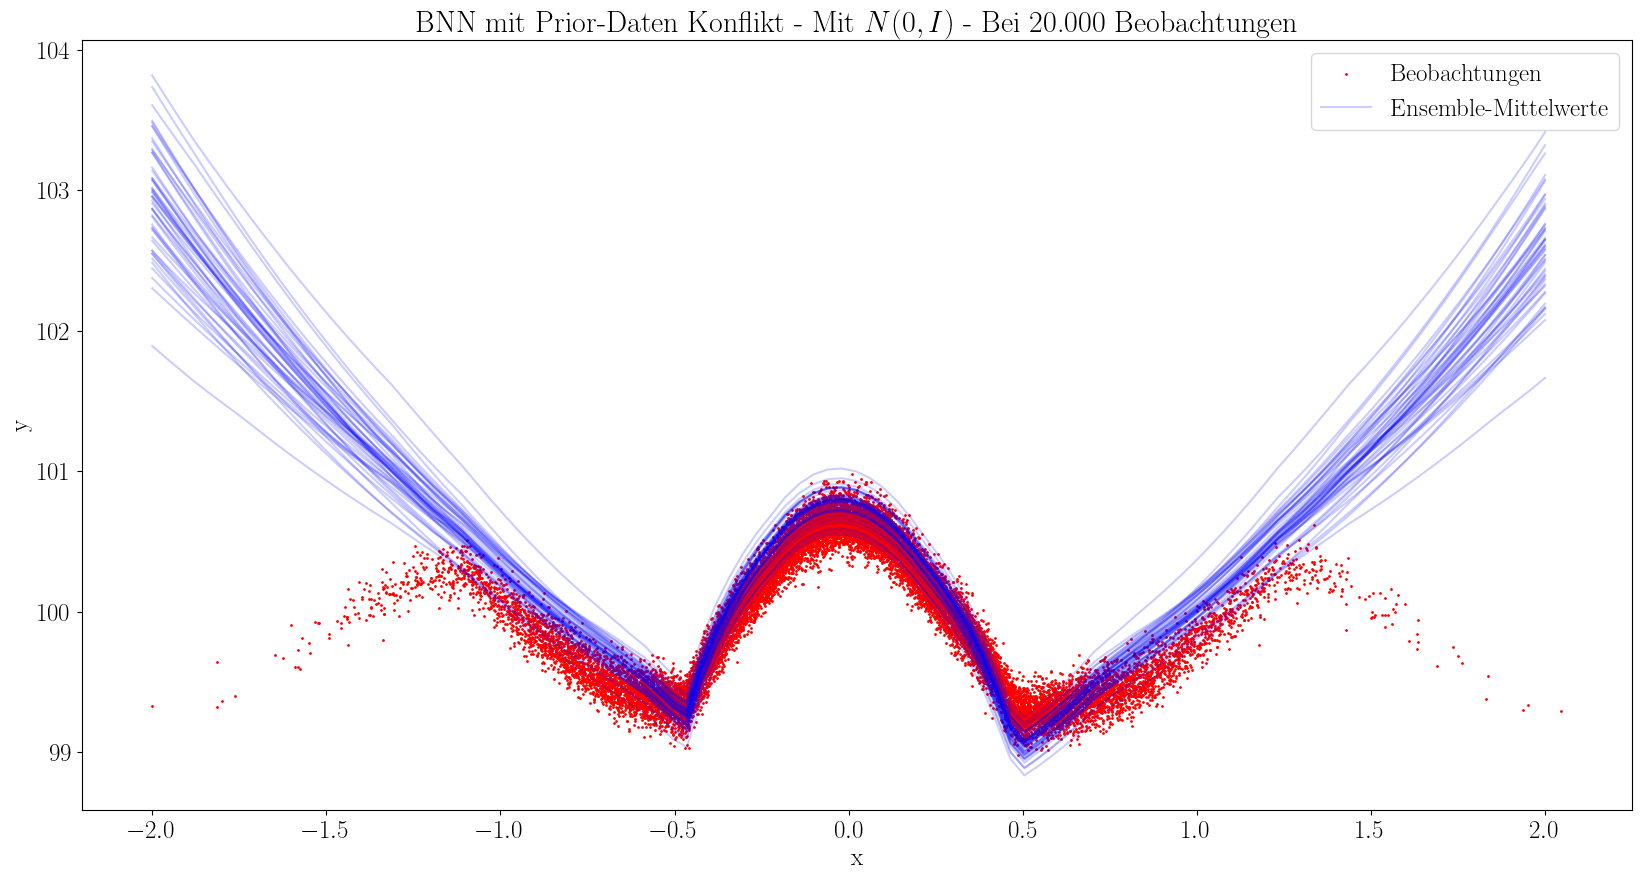

In [106]:
plt.figure(figsize=(20,10))
plt.scatter(X_pred2[:,0], y_true2, color="red", s=1, label="Beobachtungen")
plt.title(r"BNN mit Prior-Daten Konflikt - Mit $N(0, I)$ - Bei 20.000 Beobachtungen")
plt.xlabel("x")
plt.ylabel("y")
for i in range(50):
    plt.plot(X_pred_2[:,0], base_model(X_pred_2).mean(), color= "blue", alpha = .2, label="Ensemble-Mittelwerte" if i == 0 else None)
plt.legend(loc="upper right")
plt.savefig("bilder/BNN_PDK_I_10k.png", dpi=1000, bbox_inches='tight')
plt.show()

Visualisierung der Gewichte des letzten (trainieren) Layers. Offensichtlich weist die Gewichte eine recht gute Anpassung auf. Allerdings unterscheiden sich viele doch wesentlich von den _optimalen_ Parametern

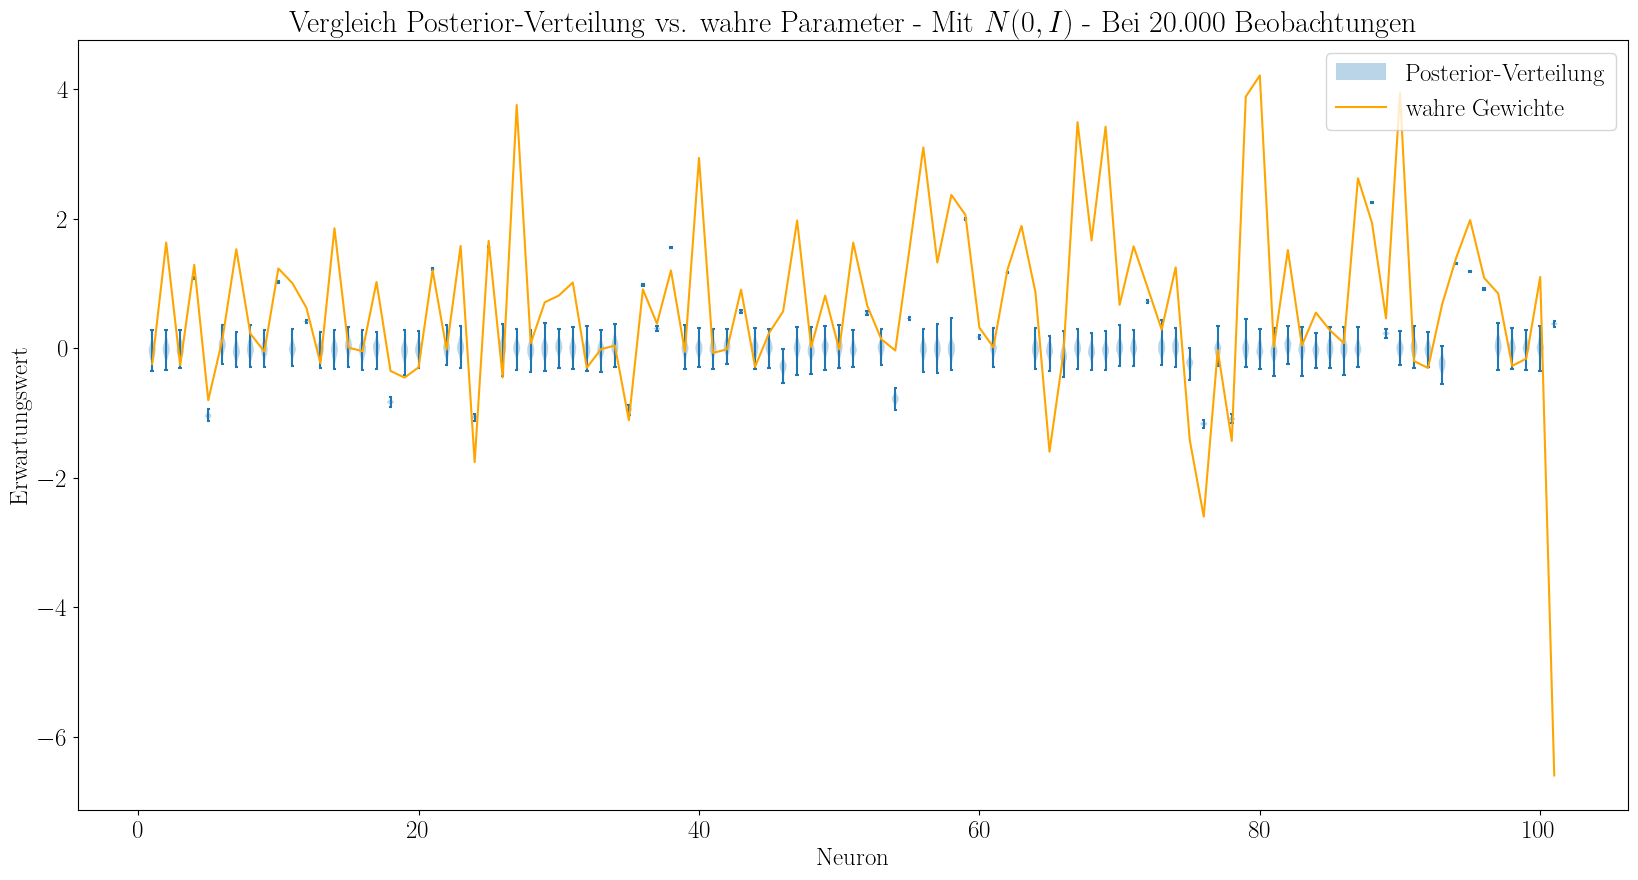

In [107]:
plt.figure(figsize=(20,10))
vp1 = plt.violinplot(np.array([np.random.normal(mean, sd, 1000) for mean, sd in zip(base_model.layers[4]._posterior(np.array([0])).mean().numpy(), base_model.layers[4]._posterior(np.array([0])).stddev().numpy())]).T)
sc1 = plt.plot(range(1, 102), np.hstack((k3.ravel(), b3.ravel())), label="wahre Gewichte", color = "orange")
plt.legend([vp1["bodies"][0], sc1[0]], ["Posterior-Verteilung", "wahre Gewichte"], loc="upper right")
plt.ylabel("Erwartungswert")
plt.xlabel("Neuron")
plt.title(r"Vergleich Posterior-Verteilung vs. wahre Parameter - Mit $N(0, I)$ - Bei 20.000 Beobachtungen")
plt.savefig("bilder/BNN_PDK_I_10k_vergleich.png", dpi=1000, bbox_inches='tight')
plt.show()

### Variation der Kovarianz

In [108]:
batch_size = 32
kl_weight = 1/int(X_pred.shape[0]/32)

base_model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(3,)), 
    tfp.layers.DenseVariational(units=100, make_posterior_fn=posterior, make_prior_fn=prior_4, kl_weight=kl_weight),
    tf.keras.layers.Activation("relu"),
    tfp.layers.DenseVariational(units=100, make_posterior_fn=posterior, make_prior_fn=prior_4, kl_weight=kl_weight),
    tf.keras.layers.Activation("relu"),
    tfp.layers.DenseVariational(units=1, make_posterior_fn=posterior, make_prior_fn=prior_4, kl_weight=kl_weight),
    tfp.layers.DistributionLambda(lambda t: tfp.distributions.Normal(loc = t, scale=.1))
])
base_model.build()

In [109]:
base_model.layers[0].trainable = False # erstes Layer
base_model.layers[2].trainable = False # zweites Layer
base_model.layers[4].trainable = True # drittes Layer

In [110]:
l_weights = base_model.get_weights()

In [111]:
#l_weights[0] = np.hstack(( np.zeros_like(k1.ravel()), np.zeros_like(b1.ravel()), np.zeros_like(k1.ravel()), np.zeros_like(b1.ravel()) )) #layer 1
l_weights[0] = np.hstack((k1.ravel(), b1.ravel(), np.ones_like(k1.ravel()) * -8, np.ones_like(b1.ravel()) * -8))
l_weights[1] = np.hstack(( k2.ravel(), b2.ravel(), np.ones_like(k2.ravel()) * -8, np.ones_like(b2.ravel()) * -8)) #layer 2
#l_weights[1] = np.hstack(( np.zeros_like(k2.ravel()), np.zeros_like(b2.ravel()), np.zeros_like(k2.ravel()), np.zeros_like(b2.ravel()) ))
#l_weights[2] = np.hstack((k3.ravel(), b3.ravel(), np.ones_like(k3.ravel()) * -8, np.ones_like(b3.ravel()) * -8)) #layer 3
#l_weights[2] = np.hstack(( np.zeros_like(k1.ravel()), np.zeros_like(b1.ravel()), np.zeros_like(k1.ravel()), np.zeros_like(b1.ravel()) ))

In [112]:
base_model.set_weights(l_weights)

In [113]:
base_model.get_weights()

[array([-4.30271292e+00, -2.21631432e+00, -3.49136543e+00, -1.86284399e+00,
        -9.69548404e-01, -5.13113356e+00, -4.09472132e+00, -3.04192138e+00,
        -1.43777466e+00, -3.03250837e+00, -2.30099440e+00, -1.57960260e+00,
        -3.40350676e+00, -4.32710409e+00, -1.76832998e+00, -2.78641367e+00,
        -3.34683824e+00, -1.77741957e+00, -3.75351930e+00, -3.70130849e+00,
        -2.73898196e+00, -1.95191038e+00, -6.07484674e+00, -3.11906242e+00,
        -1.41751719e+00, -1.01366544e+00, -4.06156778e+00, -3.18250704e+00,
        -3.17134285e+00, -2.94432569e+00, -2.43019462e+00, -3.41155005e+00,
        -5.43070459e+00, -4.28355694e+00, -4.58833188e-01, -1.55069947e+00,
        -1.92430472e+00, -2.66420770e+00, -5.75587654e+00, -4.37354422e+00,
        -3.65071440e+00, -3.16548109e+00, -3.27952099e+00,  4.02829200e-01,
        -1.73192132e+00, -3.80281806e-02, -2.61196256e+00, -2.86512040e-02,
         1.27721041e-01, -5.75428867e+00, -2.71463180e+00, -1.90074623e+00,
        -5.9

Ausführen des Modells. Es wird EarlyStopping mit einer Patience von 500 verwendet um sicherzugehen, dass das Netzwerk konvergiert ist und gleichzeitig den Rechenaufwand zu reduzieren.

In [114]:
cb = tf.keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=1e-4, patience = 500, mode = "min", verbose = 1)
base_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss = neg_log_like)
base_model.fit(X_pred2, y_true2, epochs = 10000, verbose = False, batch_size = batch_size, callbacks=cb, validation_split=.3)

Epoch 558: early stopping


Finale Gewichte des Modells. Die ersten beiden Layer sind konstant geblieben und weisen die exakten Gewichte des NNs auf

In [115]:
base_model.weights

[<tf.Variable 'dense_variational_21/posterior/constant:0' shape=(800,) dtype=float32, numpy=
 array([-4.30271292e+00, -2.21631432e+00, -3.49136543e+00, -1.86284399e+00,
        -9.69548404e-01, -5.13113356e+00, -4.09472132e+00, -3.04192138e+00,
        -1.43777466e+00, -3.03250837e+00, -2.30099440e+00, -1.57960260e+00,
        -3.40350676e+00, -4.32710409e+00, -1.76832998e+00, -2.78641367e+00,
        -3.34683824e+00, -1.77741957e+00, -3.75351930e+00, -3.70130849e+00,
        -2.73898196e+00, -1.95191038e+00, -6.07484674e+00, -3.11906242e+00,
        -1.41751719e+00, -1.01366544e+00, -4.06156778e+00, -3.18250704e+00,
        -3.17134285e+00, -2.94432569e+00, -2.43019462e+00, -3.41155005e+00,
        -5.43070459e+00, -4.28355694e+00, -4.58833188e-01, -1.55069947e+00,
        -1.92430472e+00, -2.66420770e+00, -5.75587654e+00, -4.37354422e+00,
        -3.65071440e+00, -3.16548109e+00, -3.27952099e+00,  4.02829200e-01,
        -1.73192132e+00, -3.80281806e-02, -2.61196256e+00, -2.86512040e

In [116]:
X_pred_2 = np.atleast_2d(np.linspace(-2,2, 100)).T
X_pred_2 = np.hstack((X_pred_2, X_pred_2**2, X_pred_2**3))


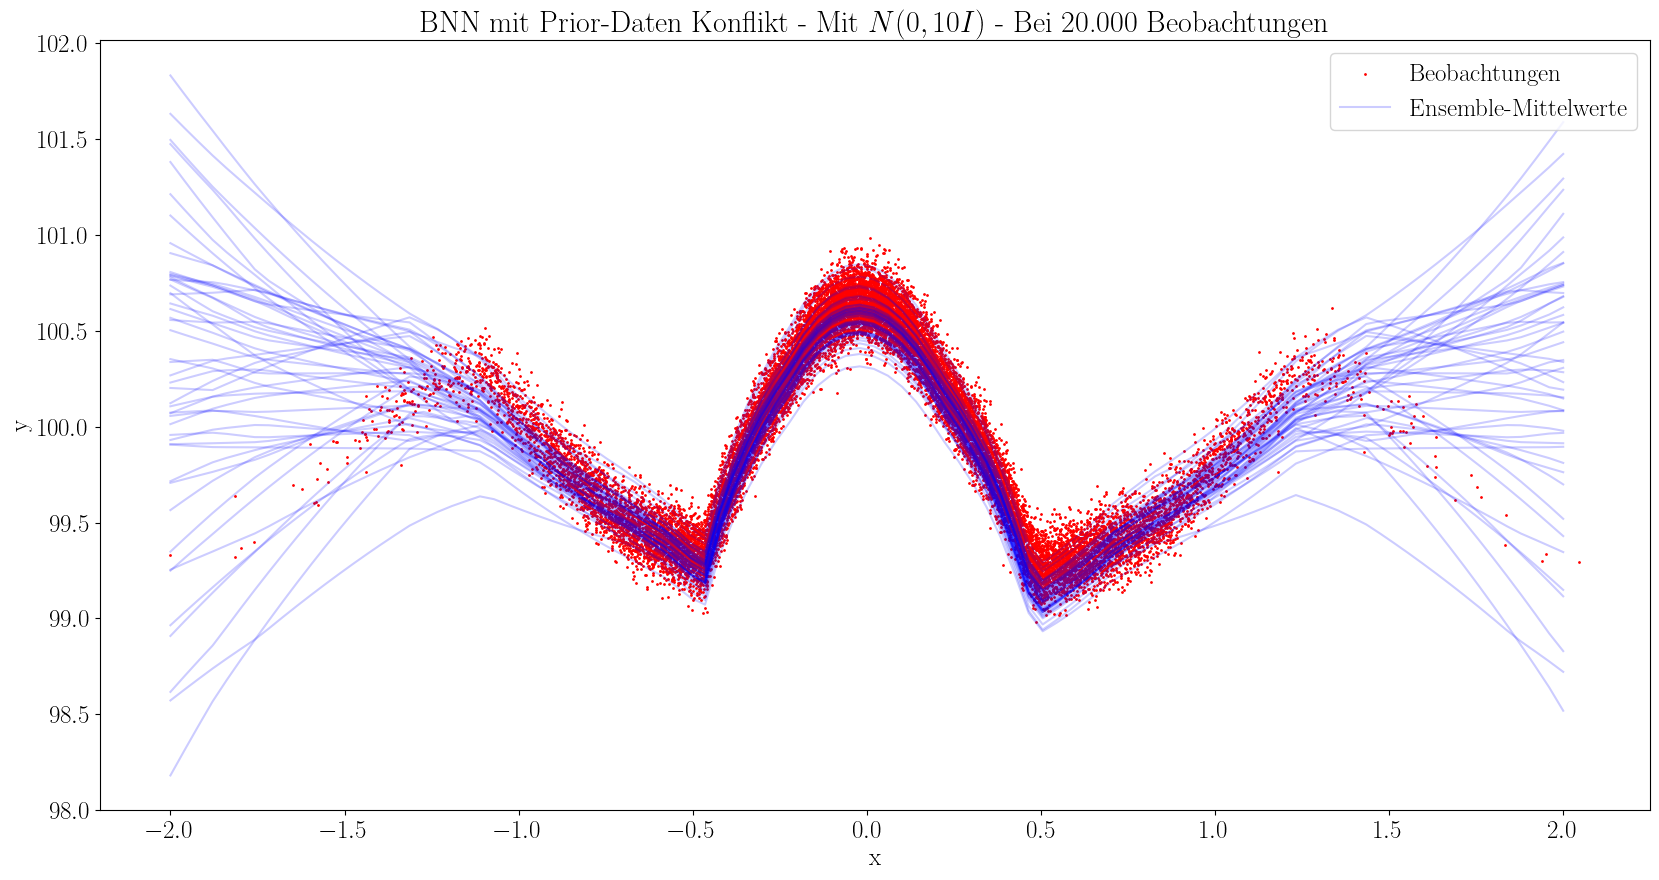

In [117]:
plt.figure(figsize=(20,10))
plt.scatter(X_pred2[:,0], y_true2, color="red", s=1, label="Beobachtungen")
plt.title(r"BNN mit Prior-Daten Konflikt - Mit $N(0, 10I)$ - Bei 20.000 Beobachtungen")
plt.xlabel("x")
plt.ylabel("y")
for i in range(50):
    plt.plot(X_pred_2[:,0], base_model(X_pred_2).mean(), color= "blue", alpha = .2, label="Ensemble-Mittelwerte" if i == 0 else None)
plt.legend(loc="upper right")
plt.savefig("bilder/BNN_PDK_4_10k.png", dpi=1000, bbox_inches='tight')
plt.show()

Visualisierung der Gewichte des letzten (trainieren) Layers. Offensichtlich weist die Gewichte eine recht gute Anpassung auf. Allerdings unterscheiden sich viele doch wesentlich von den _optimalen_ Parametern

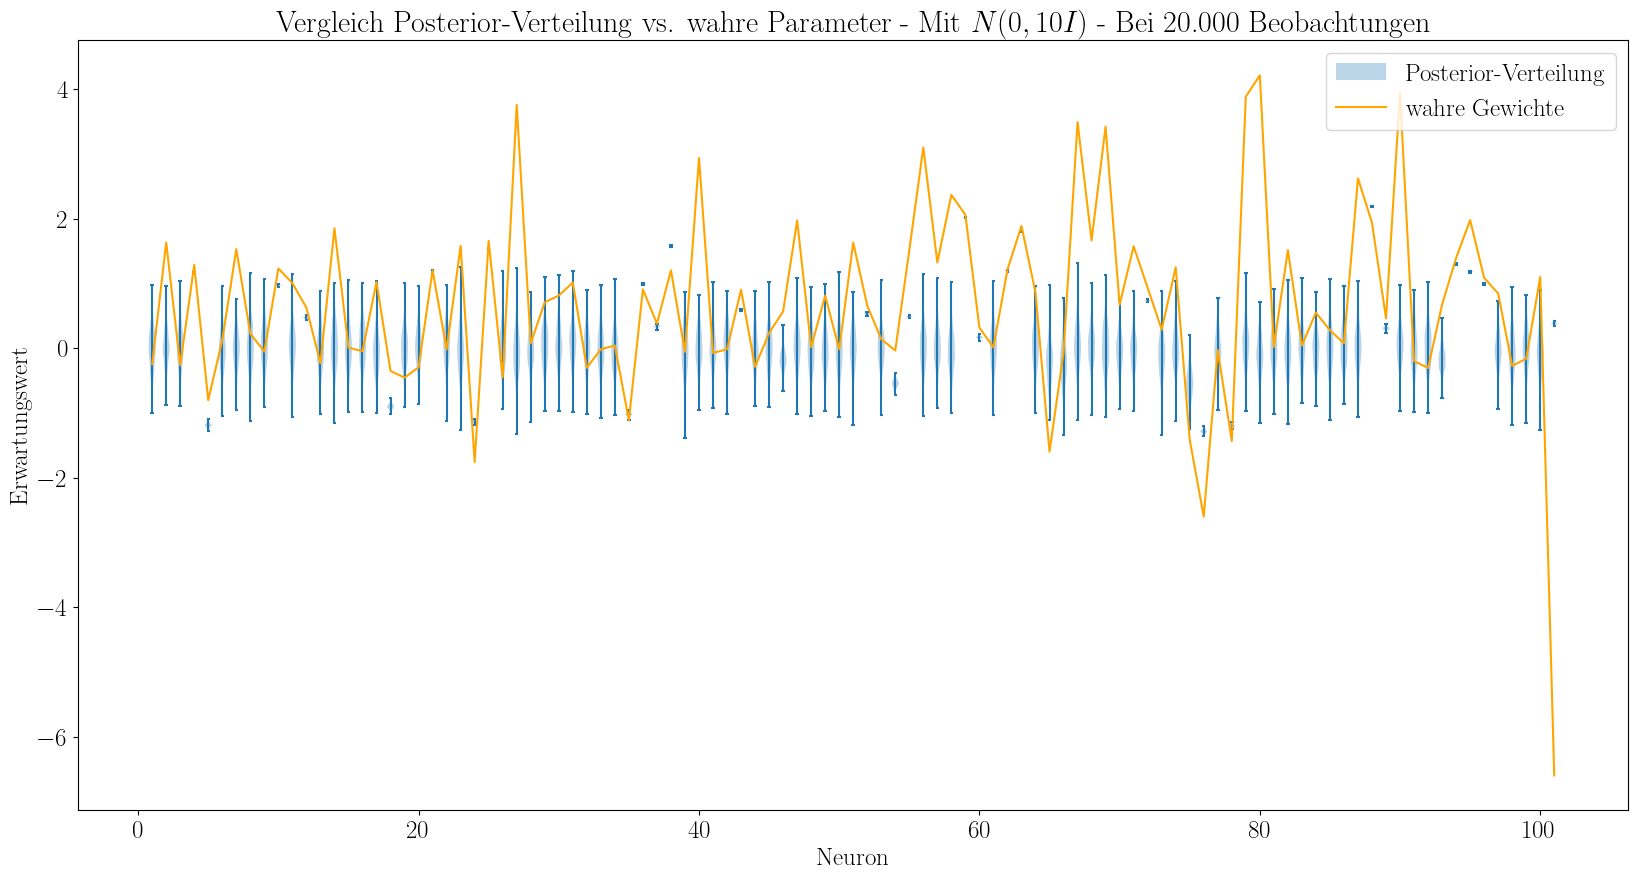

In [118]:
plt.figure(figsize=(20,10))
vp1 = plt.violinplot(np.array([np.random.normal(mean, sd, 1000) for mean, sd in zip(base_model.layers[4]._posterior(np.array([0])).mean().numpy(), base_model.layers[4]._posterior(np.array([0])).stddev().numpy())]).T)
sc1 = plt.plot(range(1, 102), np.hstack((k3.ravel(), b3.ravel())), label="wahre Gewichte", color = "orange")
plt.legend([vp1["bodies"][0], sc1[0]], ["Posterior-Verteilung", "wahre Gewichte"], loc="upper right")
plt.ylabel("Erwartungswert")
plt.xlabel("Neuron")
plt.title(r"Vergleich Posterior-Verteilung vs. wahre Parameter - Mit $N(0, 10I)$ - Bei 20.000 Beobachtungen")
plt.savefig("bilder/BNN_PDK_4_10k_vergleich.png", dpi=1000, bbox_inches='tight')
plt.show()